# Reto- Entrega 1 - Limpieza, análisis, visualización y kmeans
## Equipo 30
### A01793933 - Christian Suárez Gil
### A01793999 - Nathalia Prada

____________

Importación de librerías

In [26]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import plotly.io as pio
pio.templates.default = "plotly_white"

%matplotlib inline
# # activate plot theme
# import qeds
# qeds.themes.mpl_style();

from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from yellowbrick.cluster import KElbowVisualizer
pd.set_option('display.max_columns', None)
import seaborn as sns

## Lectura de Datos

En esta base de datos encontraras:

* Aguas subterraneas.
* Aguas superficiales.

In [27]:
Path = 'https://raw.githubusercontent.com/PosgradoMNA/Team30_ArtificialmenteInteligentes/main/Semana%209/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
a_subte = pd.read_csv(Path, index_col = 0, encoding='latin-1')

Path = 'https://raw.githubusercontent.com/PosgradoMNA/Team30_ArtificialmenteInteligentes/main/Semana%209/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
a_super = pd.read_csv(Path, index_col = 0, encoding='latin-1')

### INDICADORES DE LA CALIDAD DEL AGUA SUPERFICIAL Y SUBTERRÁNEA

## Limpieza de base de datos

### Limpieza Datos Monitoreo de Aguas Subterraneas

#### Cambio del nombre de las columnas

Imprimimos las columnas del data set:

In [28]:
a_subte.columns

Index(['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO',
       'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC',
       'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 'SDT_M_mg/L',
       'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO',
       'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC',
       'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS',
       'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L',
       'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN',
       'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

Modificamos los nombres para simplificar la lectura de los datos,a continuación se presenta una tabla con la equivalencia de numbres y la descripción de cada columna del dataset:

| **Nombre**           | **Nuevo Nombre**  | **Descripción**                                                                                                                                    |
|----------------------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| SITIO                | sitio             | Nombre del sitio de muestreo                                                                                                                       |
| ORGANISMO_DE_CUENCA  | organismo_cuenca  | Nombre del Organismo de Cuenca de agua donde se localiza el sitio de monitoreo                                                                     |
| ESTADO               | estado            | Estado donde se encuentra el sitio de muestreo                                                                                                     |
| MUNICIPIO            | municipio         | Municipio donde se encuentra el sitio de muestreo                                                                                                  |
| ACUIFERO             | acuifero          | Acuifero donde se encuentra el sitio de muestreo                                                                                                   |
| SUBTIPO              | subtipo           | Subtipo de cuerpo de agua donde se encuentra el sitio de muestreo                                                                                  |
| LONGITUD             | longitud          | Coordenada de longitud                                                                                                                             |
| LATITUD              | latitud           | Coordenada de latitud                                                                                                                              |
| PERIODO              | periodo           | Anio o periodo en que se realizo el muestreo                                                                                                       |
| ALC_mg/L             | alc               | Valor de Alcalinidad Total, en miligramos por litro                                                                                                |
| CALIDAD_ALC          | calidad_alc       | Clasificacion de la calidad del agua de acuerdo con el indicador Alcalinidad Total                                                                 |
| CONDUCT_mS/cm        | conduct           | Valor de Conductividad en microSiemens por centimetro                                                                                              |
| CALIDAD_CONDUC       | calidad_conduct   | Clasificacion de la calidad del agua de acuerdo con el indicador Conductividad                                                                     |
| SDT_mg/L             | sdt               | Valor de Solidos Disueltos Totales, en miligramos por litro                                                                                        |
| SDT_M_mg/L           | sdt_m             | Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro                                                                                |
| CALIDAD_SDT_ra       | calidad_sdt_ra    | Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Riego agricola)                                 |
| CALIDAD_SDT_salin    | calidad_sdt_salin | Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Salinizacion)                                   |
| FLUORUROS_mg/L       | fluoruros         | Valor de Fluoruros Totales (F-), en miligramos por litro                                                                                           |
| CALIDAD_FLUO         | calidad_fluo      | Clasificacion de la calidad del agua de acuerdo con el indicador Fluoruros Totales                                                                 |
| DUR_mg/L             | dur               | Valor de Dureza Total, en miligramos por litro                                                                                                     |
| CALIDAD_DUR          | calidad_dur       | Clasificacion de la calidad del agua de acuerdo con el indicador Dureza Total                                                                      |
| COLI_FEC_NMP/100_mL  | coli_fec          | Valor de Coliformes Fecales, en Numero Mas Probable por 100 mililitros                                                                             |
| CALIDAD_COLI_FEC     | calidad_coli_fec  | Clasificacion de la calidad del agua de acuerdo con el indicador Coliformes Fecales                                                                |
| N_NO3_mg/L           | n_no3             | Valor de Nitrogeno de Nitratos, en miligramos por litro                                                                                            |
| CALIDAD_N_NO3        | calidad_n_no3     | Clasificacion de la calidad del agua de acuerdo con el indicador Nitrogeno de Nitratos                                                             |
| AS_TOT_mg/L          | as                | Valor de Arsenico Total, en miligramos por litro                                                                                                   |
| CALIDAD_AS           | calidad_as        | Clasificacion de la calidad del agua de acuerdo con el indicador Arsenico Total                                                                    |
| CD_TOT_mg/L          | cd                | Valor de Cadmio Total, en miligramos por litro                                                                                                     |
| CALIDAD_CD           | calidad_cd        | Clasificacion de la calidad del agua de acuerdo con el indicador Cadmio Total                                                                      |
| CR_TOT_mg/L          | cr                | Valor de Cromo Total, en miligramos por litro                                                                                                      |
| CALIDAD_CR           | calidad_cr        | Clasificacion de la calidad del agua de acuerdo con el indicador Cromo Total                                                                       |
| HG_TOT_mg/L          | hg                | Valor de Mercurio Total, en miligramos por litro                                                                                                   |
| CALIDAD_HG           | calidad_hg        | Clasificacion de la calidad del agua de acuerdo con el indicador Mercurio Total                                                                    |
| PB_TOT_mg/L          | pb                | Valor de Plomo Total, en miligramos por litro                                                                                                      |
| CALIDAD_PB           | calidad_pb        | Clasificacion de la calidad del agua de acuerdo con el indicador Plomo Total                                                                       |
| MN_TOT_mg/L          | mn                | Valor de Manganeso Total, en miligramos por litro                                                                                                  |
| CALIDAD_MN           | calidad_mn        | Clasificacion de la calidad del agua de acuerdo con el indicador Manganeso Total                                                                   |
| FE_TOT_mg/L          | fe                | Valor de Hierro Total, en miligramos por litro                                                                                                     |
| CALIDAD_FE           | calidad_fe        | Clasificacion de la calidad del agua de acuerdo con el indicador Hierro Total                                                                      |
| SEMAFORO             | semaforo          | Indica el nivel de contaminacion de acuerdo a los contaminantes presentes                                                                          |
| CONTAMINANTES        | contaminantes     | Contaminantes presentes en incumplimiento (Contaminados)                                                                                           |
| CUMPLE_CON_ALC       | cumple_alc        |  Indica si cumple con la calidad de Baja, Media, o Alta para el Indicador Alcalinidad Total                                                        |
| CUMPLE_CON_COND      | cumple_cond       |  Indica si cumple con la calidad de Excelente para riego, Buena para riego, o Permisible para riego, para el Indicador Conductividad.              |
| CUMPLE_CON_SDT_ra    | cumple_sdt_ra     | Indica si cumple con la calidad de Excelente para riego, Cultivos sensibles o Cultivos con manejo especial, para el Indicador SDT (Riego agrícola) |
| CUMPLE_CON_SDT_salin | cumple_sdt_salin  | Indica si cumple con la calidad de Potable - Dulce o Ligeramente salobres, para el Indicador Solidos Disueltos Totales (Salinización)              |
| CUMPLE_CON_FLUO      | cumple_fluo       | Indica si cumple con la calidad de Baja, Media, o Potable - Optima, para el Indicador Fluoruros Totales                                            |
| CUMPLE_CON_DUR       | cumple_dur        | Indica si cumple con la calidad de Potable - Suave, Potable - Moderadamente suave, o Potable - Dura, para el Indicador Dureza Total.               |
| CUMPLE_CON_CF        | cumple_cf         | Indica si cumple con la calidad de Potable - Excelente, o Buena calidad, Aceptable, para el Indicador Coliformes Fecales                           |
| CUMPLE_CON_NO3       | cumple_no3        | Indica si cumple con la calidad de Potable - Excelente o Potable - Buena calidad, para el Indicador Nitrogeno de Nitratos                          |
| CUMPLE_CON_AS        | cumple_as         | Indica si cumple con la calidad de Potable - Excelente o Apta como FAAP, para el Indicador Arsenico Total                                          |
| CUMPLE_CON_CD        | cumple_cd         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cadmio Total                                                             |
| CUMPLE_CON_CR        | cumple_cr         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cromo Total                                                              |
| CUMPLE_CON_HG        | cumple_hg         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Mercurio Total                                                           |
| CUMPLE_CON_PB        | cumple_pb         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Plomo Total                                                              |
| CUMPLE_CON_MN        | cumple_mn         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Manganeso Total                                                          |
| CUMPLE_CON_FE        | cumple_fe         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Hierro Total                                                             |


In [29]:
columnas = ['sitio','organismo_cuenca','estado','municipio','acuifero','subtipo','longitud','latitud','periodo','alc','calidad_alc',
'conduct','calidad_conduct','sdt','sdt_m','calidad_sdt_ra','calidad_sdt_salin','fluoruros','calidad_fluo','dur','calidad_dur','coli_fec','calidad_coli_fec',
'n_no3','calidad_n_no3','as','calidad_as','cd','calidad_cd','cr','calidad_cr','hg','calidad_hg','pb','calidad_pb','mn','calidad_mn','fe','calidad_fe','semaforo',
'contaminantes','cumple_alc','cumple_cond','cumple_sdt_ra','cumple_sdt_salin','cumple_fluo','cumple_dur','cumple_cf','cumple_no3','cumple_as','cumple_cd','cumple_cr',
'cumple_hg','cumple_pb','cumple_mn','cumple_fe']

In [30]:
a_subte.columns = columnas

#### visualización de datos faltantes

La matriz de nulidad de $msno.matrix$ es una pantalla densa en información que permite identificar rápidamente patrones en la completitud de los datos.

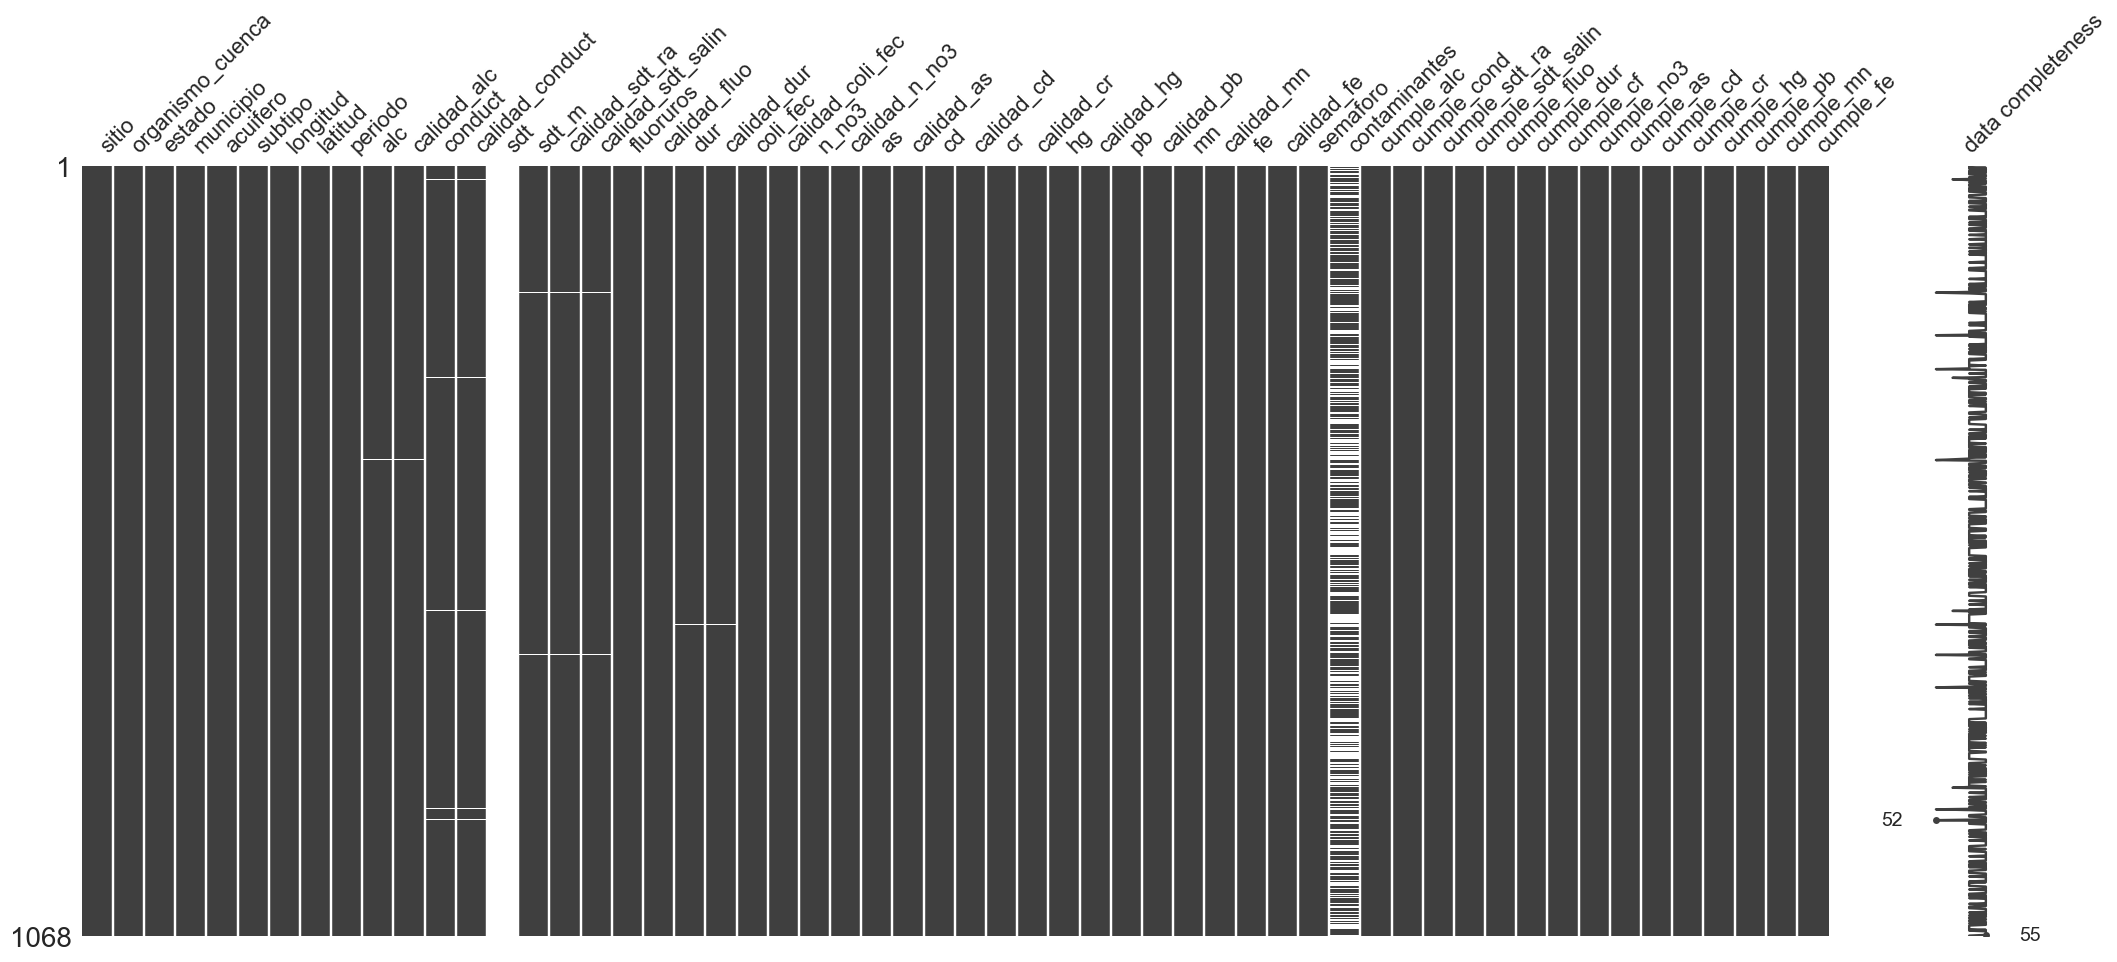

In [31]:
msno.matrix(a_subte, labels=True)
plt.show()

En la visualización de datos faltantes, podemos ver que una de las columnas con más datos faltantes es 'contaminantes', sin embargo es esta columna los campos vacios nos indican esa muestra no tiene contaminantes, por lo que se decide llenar los campos faltantes con la frase "sin contaminantes":

In [32]:
a_subte["contaminantes"].fillna("sin contaminantes", inplace = True)

In [33]:
a_subte.isna().mean()

sitio                0.000000
organismo_cuenca     0.000000
estado               0.000000
municipio            0.000000
acuifero             0.000000
subtipo              0.000000
longitud             0.000000
latitud              0.000000
periodo              0.000000
alc                  0.003745
calidad_alc          0.003745
conduct              0.005618
calidad_conduct      0.005618
sdt                  1.000000
sdt_m                0.001873
calidad_sdt_ra       0.001873
calidad_sdt_salin    0.001873
fluoruros            0.000000
calidad_fluo         0.000000
dur                  0.000936
calidad_dur          0.000936
coli_fec             0.000000
calidad_coli_fec     0.000000
n_no3                0.000936
calidad_n_no3        0.000936
as                   0.000000
calidad_as           0.000000
cd                   0.000000
calidad_cd           0.000000
cr                   0.000000
calidad_cr           0.000000
hg                   0.000000
calidad_hg           0.000000
pb        

Al revisar la media de los datos vemos que una de las columnas tiene el 100% de sus datos faltantes, el siguiente código elimina las columnas que tienen más de un determinado porcentaje de datos faltantes:

In [34]:
a_subte.drop(a_subte.columns[a_subte.isnull().mean() >= 0.3], inplace=True, axis=1)

Una vez eliminadas las columnas con más de determinado porcentaje de datos faltantes, se eliminan las filas con datos faltantes:

In [35]:
a_subte.dropna(inplace = True, axis = 0)
a_subte.shape

(1054, 55)

#### Columnas con valores "<number"

Realizamos una descripción inicial de los datos:

In [36]:
a_subte.describe(include = 'all')

sitio             organismo_cuenca   estado municipio  \
count               1054                         1054     1054      1054   
unique              1052                           13       32       447   
top     POZO VILLA UNION  CUENCAS CENTRALES DEL NORTE  DURANGO    LA PAZ   
freq                   2                          231      119        26   
mean                 NaN                          NaN      NaN       NaN   
std                  NaN                          NaN      NaN       NaN   
min                  NaN                          NaN      NaN       NaN   
25%                  NaN                          NaN      NaN       NaN   
50%                  NaN                          NaN      NaN       NaN   
75%                  NaN                          NaN      NaN       NaN   
max                  NaN                          NaN      NaN       NaN   

                    acuifero subtipo     longitud      latitud  periodo  \
count                   1054    1054  1054.000000  1054.000000   1054.0   
unique                   272       8          NaN          NaN      NaN   
top     PENINSULA DE YUCATAN    POZO          NaN          NaN      NaN   
freq                     119    1025          NaN          NaN      NaN   
mean                     NaN     NaN  -101.848270    23.161796   2020.0   
std                      NaN     NaN     6.697568     3.875005      0.0   
min                      NaN     NaN  -116.664250    14.561150   2020.0   
25%                      NaN     NaN  -105.385170    20.224857   2020.0   
50%                      NaN     NaN  -102.170665    22.640705   2020.0   
75%                      NaN     NaN   -98.971268    25.508770   2020.0   
max                      NaN     NaN   -86.864120    32.677713   2020.0   

                alc calidad_alc       conduct        calidad_conduct sdt_m  \
count   1054.000000        1054   1054.000000                   1054  1054   
unique          NaN           4           NaN                      5   914   
top             NaN        Alta           NaN  Permisible para riego   320   
freq            NaN         790           NaN                    458     4   
mean     234.695266         NaN   1142.726471                    NaN   NaN   
std      111.147849         NaN   1248.990617                    NaN   NaN   
min       26.640000         NaN    110.000000                    NaN   NaN   
25%      164.257500         NaN    506.000000                    NaN   NaN   
50%      215.825000         NaN    820.000000                    NaN   NaN   
75%      292.930000         NaN   1328.000000                    NaN   NaN   
max     1650.000000         NaN  18577.000000                    NaN   NaN   

              calidad_sdt_ra calidad_sdt_salin fluoruros calidad_fluo   dur  \
count                   1054              1054      1054         1054  1054   
unique                     5                 4       853            4   881   
top     Excelente para riego   Potable - Dulce      <0.2         Baja   <20   
freq                     485               826       158          426    25   
mean                     NaN               NaN       NaN          NaN   NaN   
std                      NaN               NaN       NaN          NaN   NaN   
min                      NaN               NaN       NaN          NaN   NaN   
25%                      NaN               NaN       NaN          NaN   NaN   
50%                      NaN               NaN       NaN          NaN   NaN   
75%                      NaN               NaN       NaN          NaN   NaN   
max                      NaN               NaN       NaN          NaN   NaN   

           calidad_dur coli_fec     calidad_coli_fec  n_no3  \
count             1054     1054                 1054   1054   
unique               4      124                    5    983   
top     Potable - Dura     <1.1  Potable - Excelente  <0.02   
freq               572      728                  730     64   
mean

Hay columnas en las cuales el valor más frecuente del data set es "<number", esto se debe a que para los valores muy pequeños se decidió usar esta nomenclatura en el data set. En estas, reemplazaremos dichos valores string por 0, y cambiamos el tipo de dato a flotante: 

In [37]:
entro=0
for i in a_subte.columns:
    mask = a_subte[i].astype(str).str.match(r'^\<')
    a_subte[i].mask(mask,0,inplace=True)
    if mask.any():
        a_subte[i]=a_subte[i].astype('float')           

In [38]:
a_subte.describe(include = 'all')

sitio             organismo_cuenca   estado municipio  \
count               1054                         1054     1054      1054   
unique              1052                           13       32       447   
top     POZO VILLA UNION  CUENCAS CENTRALES DEL NORTE  DURANGO    LA PAZ   
freq                   2                          231      119        26   
mean                 NaN                          NaN      NaN       NaN   
std                  NaN                          NaN      NaN       NaN   
min                  NaN                          NaN      NaN       NaN   
25%                  NaN                          NaN      NaN       NaN   
50%                  NaN                          NaN      NaN       NaN   
75%                  NaN                          NaN      NaN       NaN   
max                  NaN                          NaN      NaN       NaN   

                    acuifero subtipo     longitud      latitud  periodo  \
count                   1054    1054  1054.000000  1054.000000   1054.0   
unique                   272       8          NaN          NaN      NaN   
top     PENINSULA DE YUCATAN    POZO          NaN          NaN      NaN   
freq                     119    1025          NaN          NaN      NaN   
mean                     NaN     NaN  -101.848270    23.161796   2020.0   
std                      NaN     NaN     6.697568     3.875005      0.0   
min                      NaN     NaN  -116.664250    14.561150   2020.0   
25%                      NaN     NaN  -105.385170    20.224857   2020.0   
50%                      NaN     NaN  -102.170665    22.640705   2020.0   
75%                      NaN     NaN   -98.971268    25.508770   2020.0   
max                      NaN     NaN   -86.864120    32.677713   2020.0   

                alc calidad_alc       conduct        calidad_conduct sdt_m  \
count   1054.000000        1054   1054.000000                   1054  1054   
unique          NaN           4           NaN                      5   914   
top             NaN        Alta           NaN  Permisible para riego   320   
freq            NaN         790           NaN                    458     4   
mean     234.695266         NaN   1142.726471                    NaN   NaN   
std      111.147849         NaN   1248.990617                    NaN   NaN   
min       26.640000         NaN    110.000000                    NaN   NaN   
25%      164.257500         NaN    506.000000                    NaN   NaN   
50%      215.825000         NaN    820.000000                    NaN   NaN   
75%      292.930000         NaN   1328.000000                    NaN   NaN   
max     1650.000000         NaN  18577.000000                    NaN   NaN   

              calidad_sdt_ra calidad_sdt_salin    fluoruros calidad_fluo  \
count                   1054              1054  1054.000000         1054   
unique                     5                 4          NaN            4   
top     Excelente para riego   Potable - Dulce          NaN         Baja   
freq                     485               826          NaN          426   
mean                     NaN               NaN     1.048566          NaN   
std                      NaN               NaN     1.946119          NaN   
min                      NaN               NaN     0.000000          NaN   
25%                      NaN               NaN     0.269475          NaN   
50%                      NaN               NaN     0.506950          NaN   
75%                      NaN               NaN     1.142400          NaN   
max                      NaN               NaN    34.803300          NaN   

                dur     calidad_dur      coli_fec     calidad_coli_fec  \
count   1054.000000            1054   1054.000000                 1054   
unique          NaN               4           NaN                    5   
top             NaN  Potable - Dura           NaN  Potable - Excelente   
freq            NaN             572           NaN          

#### Revisión de tipos de datos

Ahora todas las variables numericas parecen tener el tipo correcto de datos, exeptuando sdt_m que contiene el "Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro" y periodo:

In [39]:
a_subte.dtypes

sitio                 object
organismo_cuenca      object
estado                object
municipio             object
acuifero              object
subtipo               object
longitud             float64
latitud              float64
periodo                int64
alc                  float64
calidad_alc           object
conduct              float64
calidad_conduct       object
sdt_m                 object
calidad_sdt_ra        object
calidad_sdt_salin     object
fluoruros            float64
calidad_fluo          object
dur                  float64
calidad_dur           object
coli_fec             float64
calidad_coli_fec      object
n_no3                float64
calidad_n_no3         object
as                   float64
calidad_as            object
cd                   float64
calidad_cd            object
cr                   float64
calidad_cr            object
hg                   float64
calidad_hg            object
pb                   float64
calidad_pb            object
mn            

In [40]:
a_subte['sdt_m']=a_subte['sdt_m'].astype('float')  
a_subte['periodo']=a_subte['periodo'].astype('float') 

#### Columnas con único valor

Las columnas con un único valor no agregan valor al dataframe por lo que se eliminan del Data Frame:

In [41]:
a_subte.columns[a_subte.nunique()==1]

Index(['periodo'], dtype='object')

In [42]:
a_subte.drop(a_subte.columns[a_subte.nunique()==1], inplace=True, axis=1)

#### Encoding de la variable semanforo

Transformamos los valores categóricos de las características relevantes como semaforo en valores numéricos:

In [43]:
a_subte['semaforo_e']=a_subte['semaforo'].map({'Verde':0,'Amarillo':1,'Rojo':2})
a_subte['semaforo_e']=a_subte['semaforo_e'].astype('float')

 ## Explorar datos

### exploración Datos Monitoreo de Aguas Subterraneas

| **Nombre**           | **Nuevo Nombre**  | **Descripción**                                                                                                                                    |
|----------------------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| SITIO                | sitio             | Nombre del sitio de muestreo                                                                                                                       |
| ORGANISMO_DE_CUENCA  | organismo_cuenca  | Nombre del Organismo de Cuenca de agua donde se localiza el sitio de monitoreo                                                                     |
| ESTADO               | estado            | Estado donde se encuentra el sitio de muestreo                                                                                                     |
| MUNICIPIO            | municipio         | Municipio donde se encuentra el sitio de muestreo                                                                                                  |
| ACUIFERO             | acuifero          | Acuifero donde se encuentra el sitio de muestreo                                                                                                   |
| SUBTIPO              | subtipo           | Subtipo de cuerpo de agua donde se encuentra el sitio de muestreo                                                                                  |
| LONGITUD             | longitud          | Coordenada de longitud                                                                                                                             |
| LATITUD              | latitud           | Coordenada de latitud                                                                                                                              |
| PERIODO              | periodo           | Anio o periodo en que se realizo el muestreo                                                                                                       |
| ALC_mg/L             | alc               | Valor de Alcalinidad Total, en miligramos por litro                                                                                                |
| CALIDAD_ALC          | calidad_alc       | Clasificacion de la calidad del agua de acuerdo con el indicador Alcalinidad Total                                                                 |
| CONDUCT_mS/cm        | conduct           | Valor de Conductividad en microSiemens por centimetro                                                                                              |
| CALIDAD_CONDUC       | calidad_conduct   | Clasificacion de la calidad del agua de acuerdo con el indicador Conductividad                                                                     |
| SDT_mg/L             | sdt               | Valor de Solidos Disueltos Totales, en miligramos por litro                                                                                        |
| SDT_M_mg/L           | sdt_m             | Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro                                                                                |
| CALIDAD_SDT_ra       | calidad_sdt_ra    | Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Riego agricola)                                 |
| CALIDAD_SDT_salin    | calidad_sdt_salin | Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Salinizacion)                                   |
| FLUORUROS_mg/L       | fluoruros         | Valor de Fluoruros Totales (F-), en miligramos por litro                                                                                           |
| CALIDAD_FLUO         | calidad_fluo      | Clasificacion de la calidad del agua de acuerdo con el indicador Fluoruros Totales                                                                 |
| DUR_mg/L             | dur               | Valor de Dureza Total, en miligramos por litro                                                                                                     |
| CALIDAD_DUR          | calidad_dur       | Clasificacion de la calidad del agua de acuerdo con el indicador Dureza Total                                                                      |
| COLI_FEC_NMP/100_mL  | coli_fec          | Valor de Coliformes Fecales, en Numero Mas Probable por 100 mililitros                                                                             |
| CALIDAD_COLI_FEC     | calidad_coli_fec  | Clasificacion de la calidad del agua de acuerdo con el indicador Coliformes Fecales                                                                |
| N_NO3_mg/L           | n_no3             | Valor de Nitrogeno de Nitratos, en miligramos por litro                                                                                            |
| CALIDAD_N_NO3        | calidad_n_no3     | Clasificacion de la calidad del agua de acuerdo con el indicador Nitrogeno de Nitratos                                                             |
| AS_TOT_mg/L          | as                | Valor de Arsenico Total, en miligramos por litro                                                                                                   |
| CALIDAD_AS           | calidad_as        | Clasificacion de la calidad del agua de acuerdo con el indicador Arsenico Total                                                                    |
| CD_TOT_mg/L          | cd                | Valor de Cadmio Total, en miligramos por litro                                                                                                     |
| CALIDAD_CD           | calidad_cd        | Clasificacion de la calidad del agua de acuerdo con el indicador Cadmio Total                                                                      |
| CR_TOT_mg/L          | cr                | Valor de Cromo Total, en miligramos por litro                                                                                                      |
| CALIDAD_CR           | calidad_cr        | Clasificacion de la calidad del agua de acuerdo con el indicador Cromo Total                                                                       |
| HG_TOT_mg/L          | hg                | Valor de Mercurio Total, en miligramos por litro                                                                                                   |
| CALIDAD_HG           | calidad_hg        | Clasificacion de la calidad del agua de acuerdo con el indicador Mercurio Total                                                                    |
| PB_TOT_mg/L          | pb                | Valor de Plomo Total, en miligramos por litro                                                                                                      |
| CALIDAD_PB           | calidad_pb        | Clasificacion de la calidad del agua de acuerdo con el indicador Plomo Total                                                                       |
| MN_TOT_mg/L          | mn                | Valor de Manganeso Total, en miligramos por litro                                                                                                  |
| CALIDAD_MN           | calidad_mn        | Clasificacion de la calidad del agua de acuerdo con el indicador Manganeso Total                                                                   |
| FE_TOT_mg/L          | fe                | Valor de Hierro Total, en miligramos por litro                                                                                                     |
| CALIDAD_FE           | calidad_fe        | Clasificacion de la calidad del agua de acuerdo con el indicador Hierro Total                                                                      |
| SEMAFORO             | semaforo          | Indica el nivel de contaminacion de acuerdo a los contaminantes presentes                                                                          |
| CONTAMINANTES        | contaminantes     | Contaminantes presentes en incumplimiento (Contaminados)                                                                                           |
| CUMPLE_CON_ALC       | cumple_alc        |  Indica si cumple con la calidad de Baja, Media, o Alta para el Indicador Alcalinidad Total                                                        |
| CUMPLE_CON_COND      | cumple_cond       |  Indica si cumple con la calidad de Excelente para riego, Buena para riego, o Permisible para riego, para el Indicador Conductividad.              |
| CUMPLE_CON_SDT_ra    | cumple_sdt_ra     | Indica si cumple con la calidad de Excelente para riego, Cultivos sensibles o Cultivos con manejo especial, para el Indicador SDT (Riego agrícola) |
| CUMPLE_CON_SDT_salin | cumple_sdt_salin  | Indica si cumple con la calidad de Potable - Dulce o Ligeramente salobres, para el Indicador Solidos Disueltos Totales (Salinización)              |
| CUMPLE_CON_FLUO      | cumple_fluo       | Indica si cumple con la calidad de Baja, Media, o Potable - Optima, para el Indicador Fluoruros Totales                                            |
| CUMPLE_CON_DUR       | cumple_dur        | Indica si cumple con la calidad de Potable - Suave, Potable - Moderadamente suave, o Potable - Dura, para el Indicador Dureza Total.               |
| CUMPLE_CON_CF        | cumple_cf         | Indica si cumple con la calidad de Potable - Excelente, o Buena calidad, Aceptable, para el Indicador Coliformes Fecales                           |
| CUMPLE_CON_NO3       | cumple_no3        | Indica si cumple con la calidad de Potable - Excelente o Potable - Buena calidad, para el Indicador Nitrogeno de Nitratos                          |
| CUMPLE_CON_AS        | cumple_as         | Indica si cumple con la calidad de Potable - Excelente o Apta como FAAP, para el Indicador Arsenico Total                                          |
| CUMPLE_CON_CD        | cumple_cd         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cadmio Total                                                             |
| CUMPLE_CON_CR        | cumple_cr         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cromo Total                                                              |
| CUMPLE_CON_HG        | cumple_hg         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Mercurio Total                                                           |
| CUMPLE_CON_PB        | cumple_pb         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Plomo Total                                                              |
| CUMPLE_CON_MN        | cumple_mn         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Manganeso Total                                                          |
| CUMPLE_CON_FE        | cumple_fe         | Indica si cumple con la calidad de Potable - Excelente, para el Indicador Hierro Total                                                             |
|                      | semaforo_e        | Columna con los valores semaforo codificados de la siguiente manera: Verde:0,Amarillo:1,Rojo:2            |


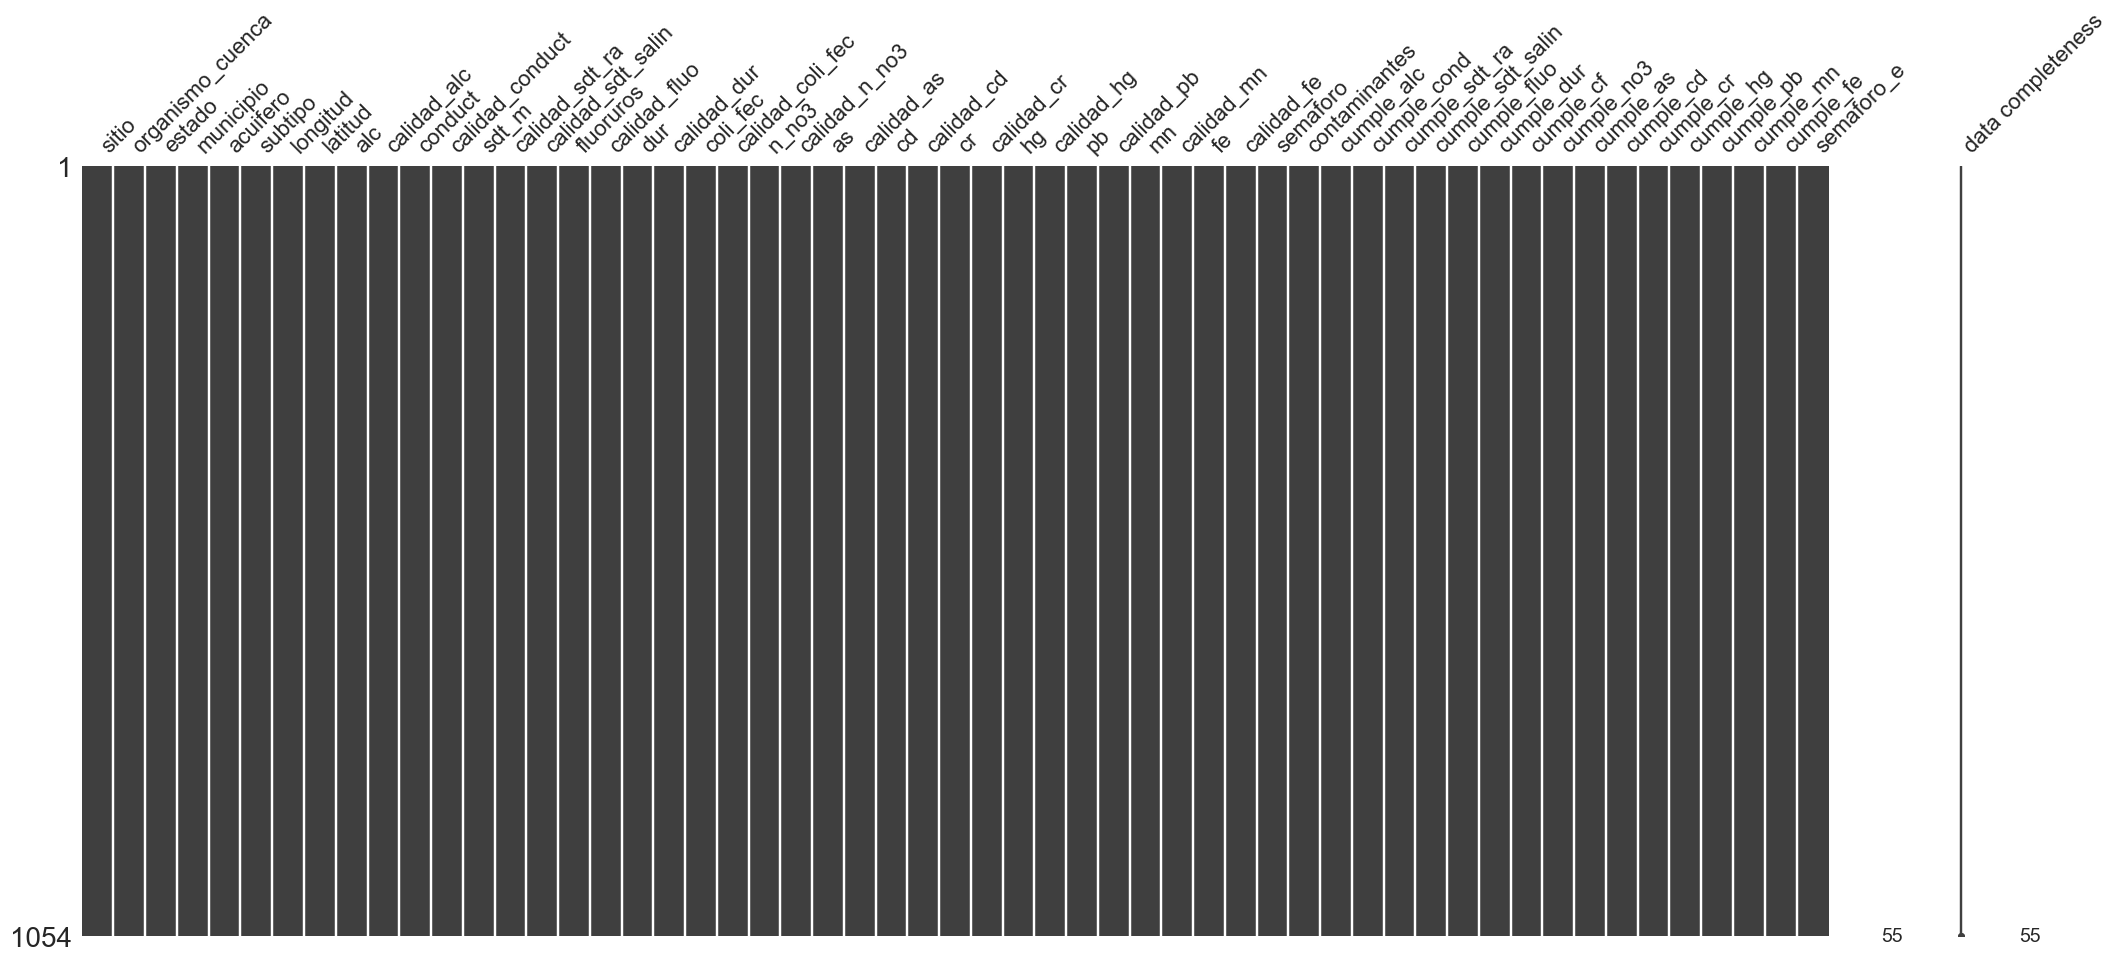

In [44]:
msno.matrix(a_subte, labels=True)
plt.show()

In [45]:
a_subte.shape

(1054, 55)

In [46]:
a_subte.describe()

longitud      latitud          alc       conduct         sdt_m  \
count  1054.000000  1054.000000  1054.000000   1054.000000   1054.000000   
mean   -101.848270    23.161796   234.695266   1142.726471    896.945797   
std       6.697568     3.875005   111.147849   1248.990617   2765.757924   
min    -116.664250    14.561150    26.640000    110.000000    101.200000   
25%    -105.385170    20.224857   164.257500    506.000000    338.050000   
50%    -102.170665    22.640705   215.825000    820.000000    551.400000   
75%     -98.971268    25.508770   292.930000   1328.000000    915.600000   
max     -86.864120    32.677713  1650.000000  18577.000000  82170.000000   

         fluoruros          dur      coli_fec        n_no3           as  \
count  1054.000000  1054.000000   1054.000000  1054.000000  1054.000000   
mean      1.048566   349.419201    358.974383     4.320437     0.011876   
std       1.946119   361.406686   2065.837863     8.378957     0.037307   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.269475   121.512000      0.000000     0.651667     0.000000   
50%       0.506950   245.994450      0.000000     2.082916     0.000000   
75%       1.142400   455.617200     10.750000     5.190385     0.000000   
max      34.803300  3810.692200  24196.000000   121.007813     0.452200   

                cd           cr           hg           pb           mn  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.000036     0.009349     0.000103     0.000428     0.072190   
std       0.001004     0.155640     0.000542     0.003768     0.379003   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.009830   
max       0.032110     5.003200     0.014150     0.080900     8.982000   

                fe   semaforo_e  
count  1054.000000  1054.000000  
mean      0.402842     0.957306  
std       5.574973     0.875475  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.046900     1.000000  
75%       0.172275     2.000000  
max     178.615000     2.000000

In [47]:
a_subte.describe(include = 'object')

sitio             organismo_cuenca   estado municipio  \
count               1054                         1054     1054      1054   
unique              1052                           13       32       447   
top     POZO VILLA UNION  CUENCAS CENTRALES DEL NORTE  DURANGO    LA PAZ   
freq                   2                          231      119        26   

                    acuifero subtipo calidad_alc        calidad_conduct  \
count                   1054    1054        1054                   1054   
unique                   272       8           4                      5   
top     PENINSULA DE YUCATAN    POZO        Alta  Permisible para riego   
freq                     119    1025         790                    458   

              calidad_sdt_ra calidad_sdt_salin calidad_fluo     calidad_dur  \
count                   1054              1054         1054            1054   
unique                     5                 4            4               4   
top     Excelente para riego   Potable - Dulce         Baja  Potable - Dura   
freq                     485               826          426             572   

           calidad_coli_fec        calidad_n_no3           calidad_as  \
count                  1054                 1054                 1054   
unique                    5                    3                    3   
top     Potable - Excelente  Potable - Excelente  Potable - Excelente   
freq                    730                  780                  805   

                 calidad_cd           calidad_cr           calidad_hg  \
count                  1054                 1054                 1054   
unique                    2                    2                    2   
top     Potable - Excelente  Potable - Excelente  Potable - Excelente   
freq                   1052                 1039                 1053   

                 calidad_pb           calidad_mn           calidad_fe  \
count                  1054                 1054                 1054   
unique                    2                    3                    2   
top     Potable - Excelente  Potable - Excelente  Potable - Excelente   
freq                   1042                  969                  920   

       semaforo      contaminantes cumple_alc cumple_cond cumple_sdt_ra  \
count      1054               1054       1054        1054          1054   
unique        3                126          2           2             2   
top       Verde  sin contaminantes         SI          SI            SI   
freq        427                427        997         931           984   

       cumple_sdt_salin cumple_fluo cumple_dur cumple_cf cumple_no3 cumple_as  \
count              1054        1054       1054      1054       1054      1054   
unique                2           2          2         2          2         2   
top                  SI          SI         SI        SI         SI        SI   
freq                984         864        829       993        974       929   

       cumple_cd cumple_cr cumple_hg cumple_pb cumple_mn cumple_fe  
count       1054      1054      1054      1054      1054      1054  
unique         2         2         2         2         2         2  
top           SI        SI        SI        SI        SI        SI  
freq        1052      1039      1053      1042       969       920

#### Visualización de Datos

##### Variables no númericas

Se seleccionan las colunas no numéricas con menos de 35 datos únicos para ser graficadas con gráficos de barras:

In [48]:
col_bar= a_subte[a_subte.columns[a_subte.nunique()<35]].select_dtypes(exclude='number').columns
col_bar

Index(['organismo_cuenca', 'estado', 'subtipo', 'calidad_alc',
       'calidad_conduct', 'calidad_sdt_ra', 'calidad_sdt_salin',
       'calidad_fluo', 'calidad_dur', 'calidad_coli_fec', 'calidad_n_no3',
       'calidad_as', 'calidad_cd', 'calidad_cr', 'calidad_hg', 'calidad_pb',
       'calidad_mn', 'calidad_fe', 'semaforo', 'cumple_alc', 'cumple_cond',
       'cumple_sdt_ra', 'cumple_sdt_salin', 'cumple_fluo', 'cumple_dur',
       'cumple_cf', 'cumple_no3', 'cumple_as', 'cumple_cd', 'cumple_cr',
       'cumple_hg', 'cumple_pb', 'cumple_mn', 'cumple_fe'],
      dtype='object')

In [49]:
for i in col_bar:
    fig = px.bar(a_subte, x=i)
    #fig = px.box(a_subte, x=i)
    fig.show()

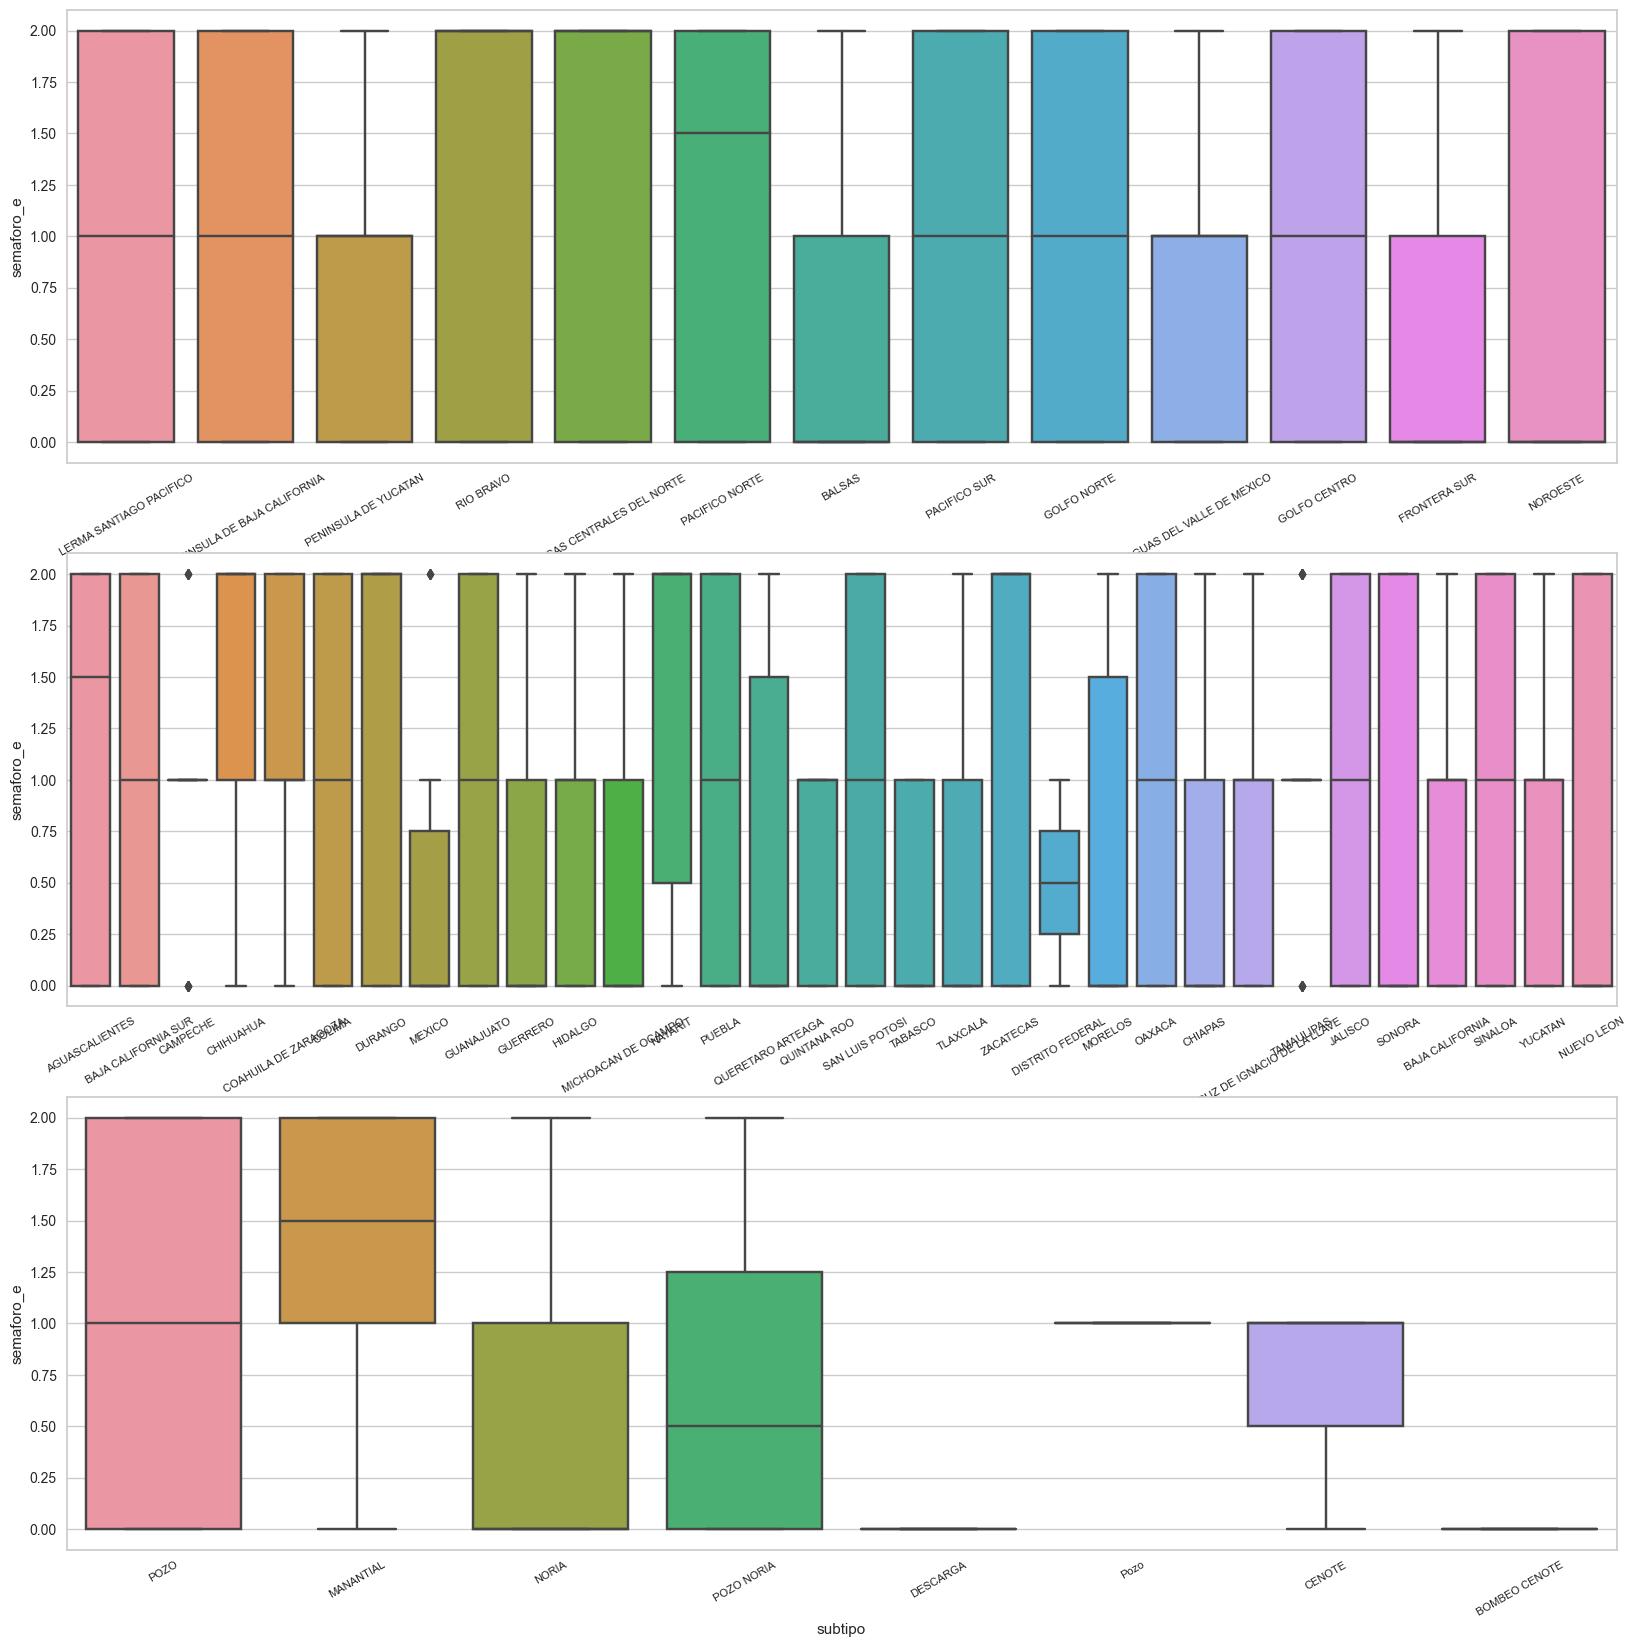

In [50]:
cmcats=['organismo_cuenca', 'estado', 'subtipo']
plt.figure(figsize=(20,20))
for i,var in enumerate(cmcats):
    plt.subplot(3,1,i+1)
    plt.xticks(fontsize=8, rotation=30)
    sns.boxplot(x=var, y='semaforo_e', data=a_subte)

##### Variables Númericas

Se seleccionan las variables númericas y se grafican diagramas de cajas:

In [51]:
col_num=a_subte.select_dtypes(include='number').columns
col_num

Index(['longitud', 'latitud', 'alc', 'conduct', 'sdt_m', 'fluoruros', 'dur',
       'coli_fec', 'n_no3', 'as', 'cd', 'cr', 'hg', 'pb', 'mn', 'fe',
       'semaforo_e'],
      dtype='object')

In [52]:
for i in col_num:
    fig = px.box(a_subte, x=i)
    fig.show()

Text(0.5, 1.0, 'Correlations between continous variables')

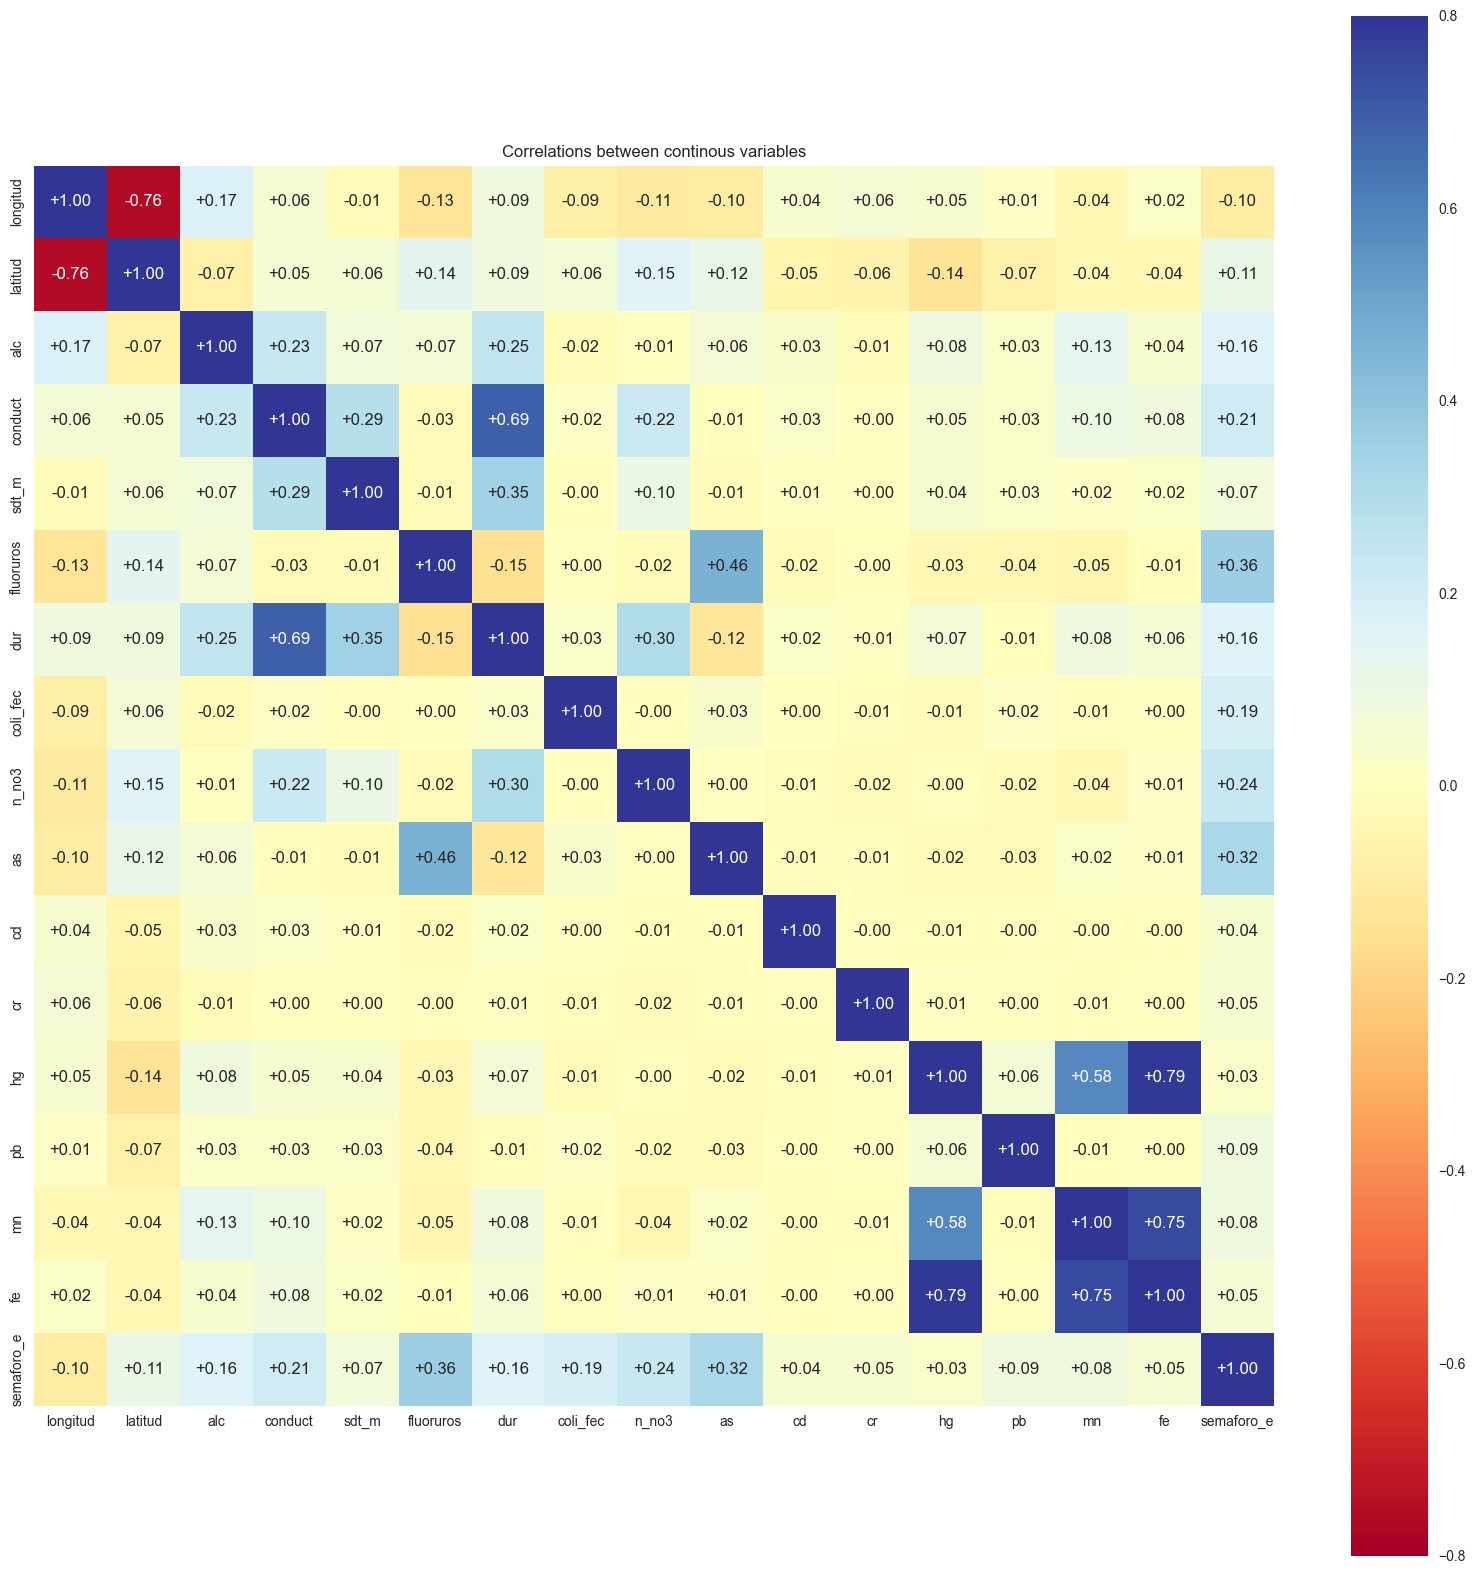

In [53]:
# plot correlations between continous variables:
plt.figure(figsize=(20,20))
sns.heatmap(a_subte[col_num].corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.2f")
plt.title("Correlations between continous variables")

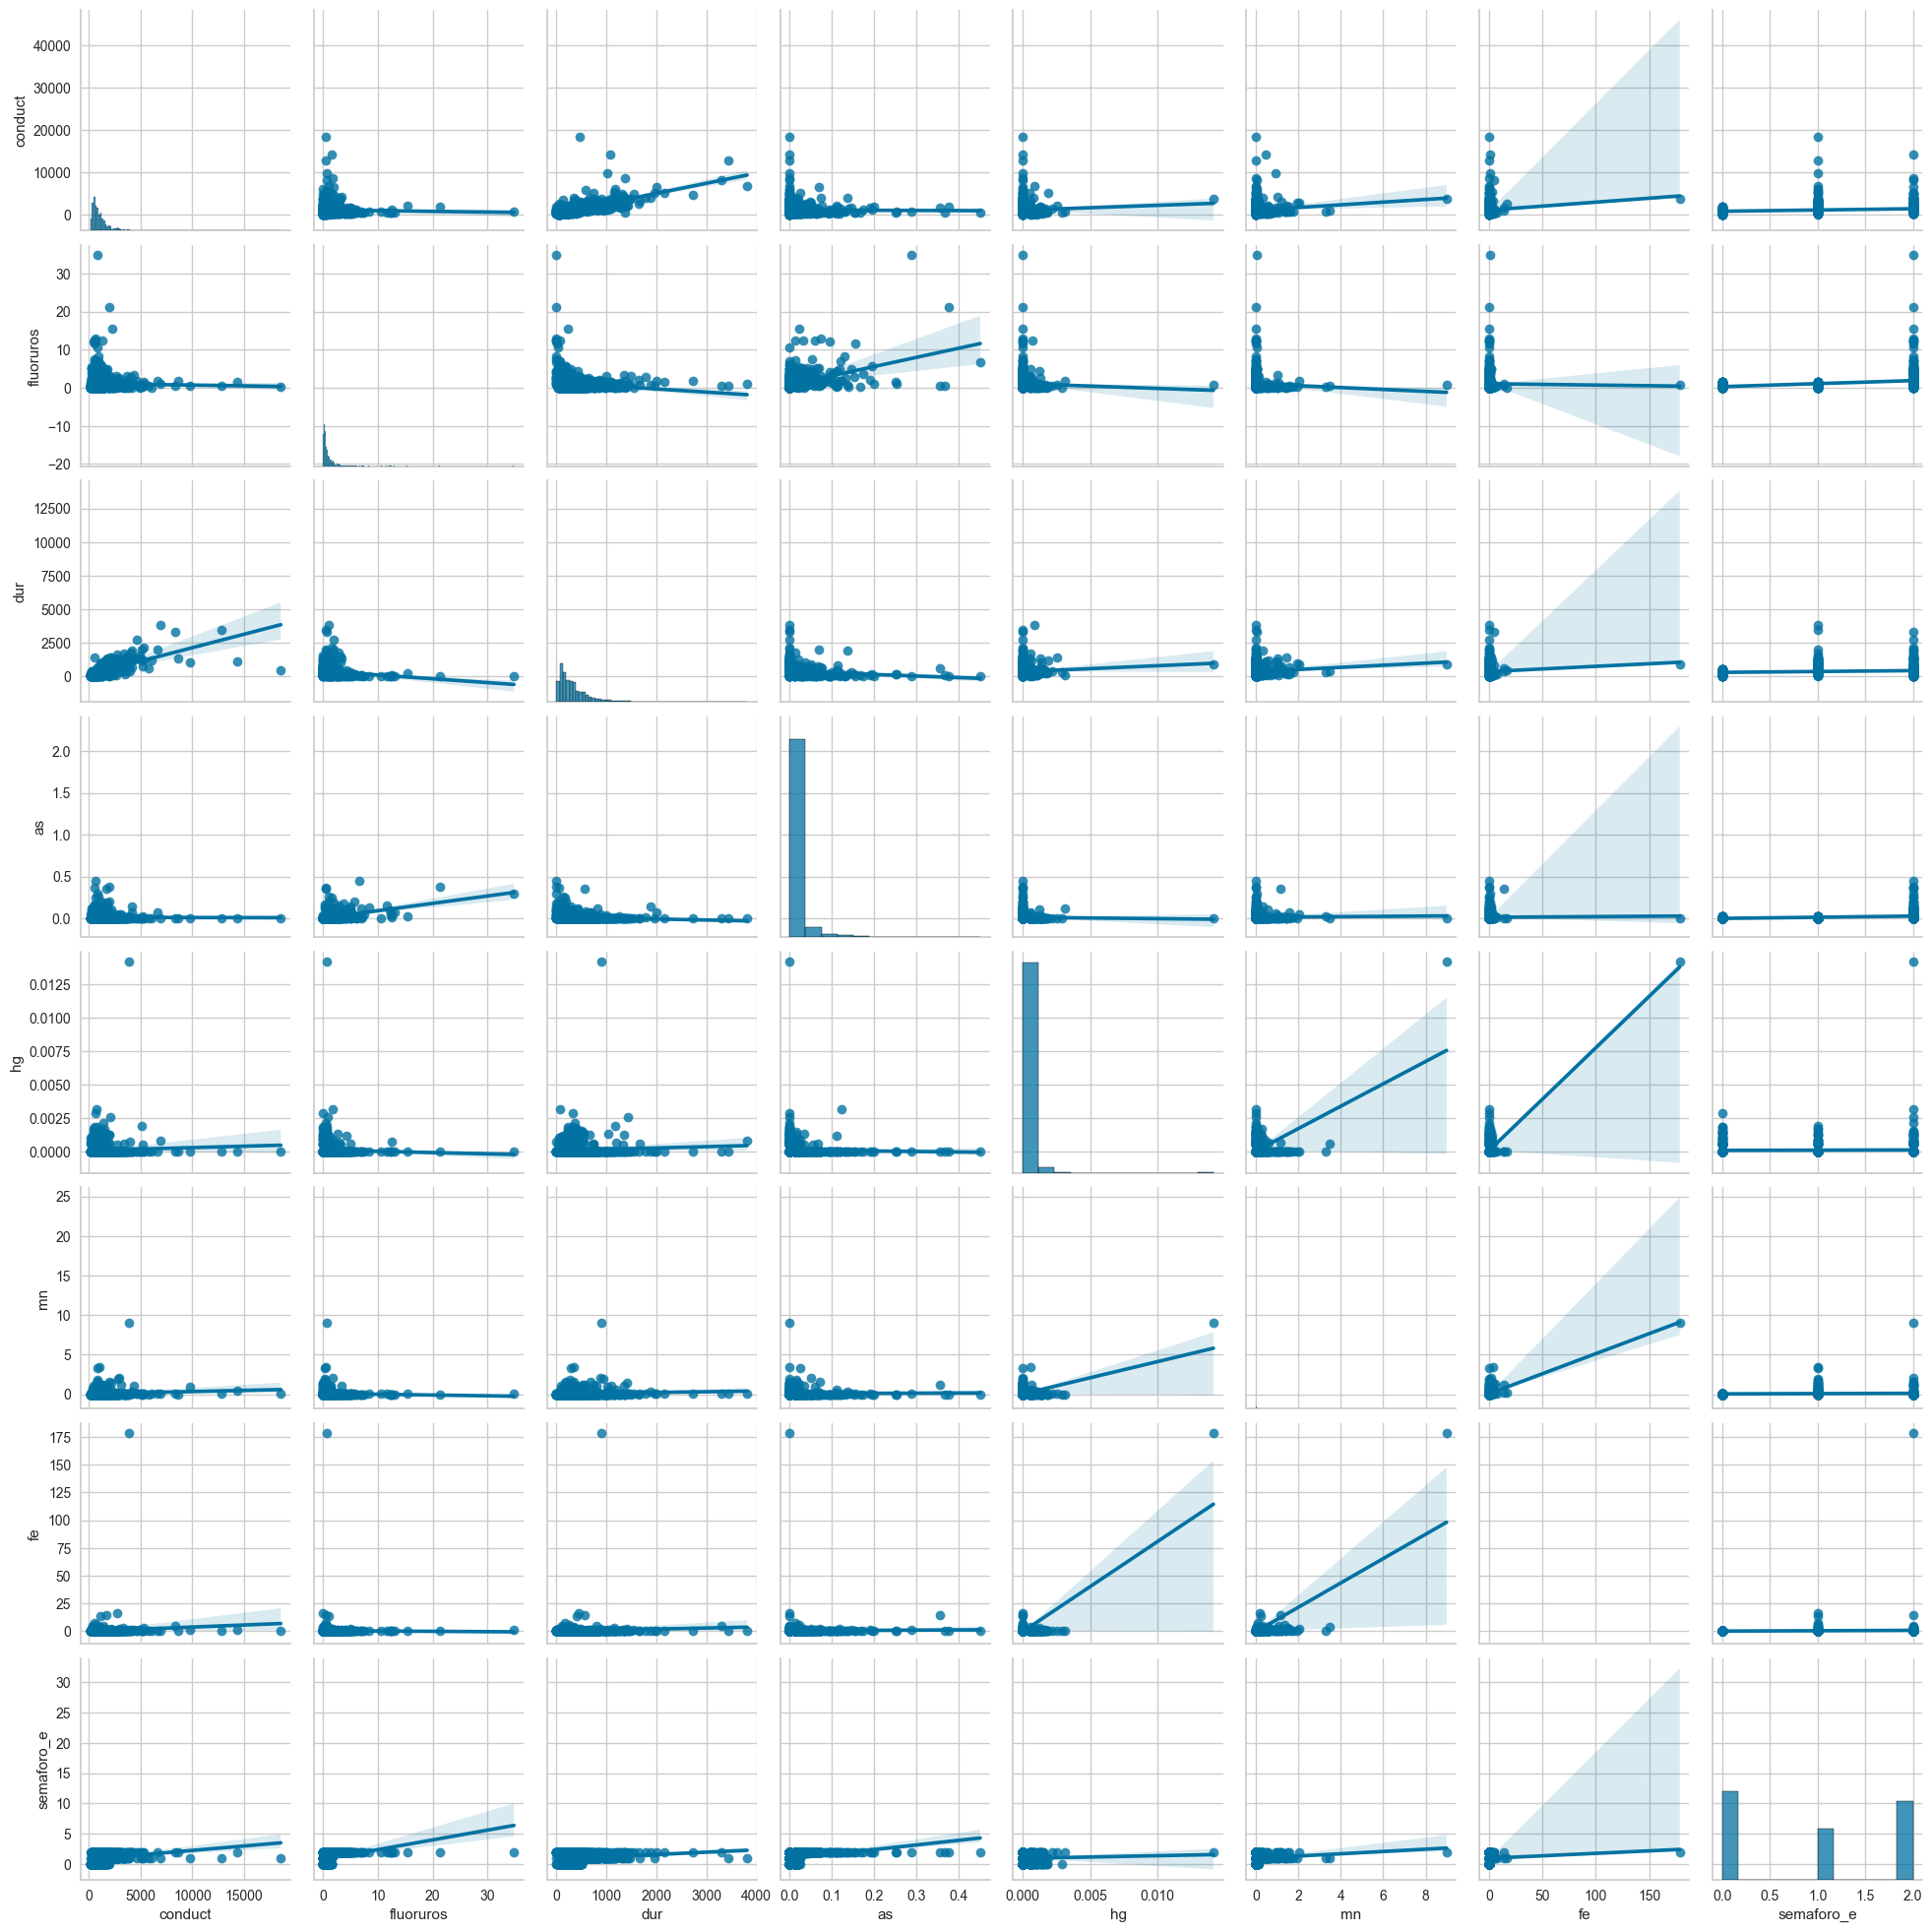

In [54]:
sns.pairplot(a_subte, vars=['conduct', 'fluoruros', 'dur', 'as',  'hg', 'mn', 'fe','semaforo_e'], kind='reg',diag_kind='hist')

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

Creamos una columna index1 para conservar un identificador de los datos:

In [55]:
a_subte.index.is_unique

True

In [56]:
a_subte['index1'] = a_subte.index

In [57]:
a_subte.columns

Index(['sitio', 'organismo_cuenca', 'estado', 'municipio', 'acuifero',
       'subtipo', 'longitud', 'latitud', 'alc', 'calidad_alc', 'conduct',
       'calidad_conduct', 'sdt_m', 'calidad_sdt_ra', 'calidad_sdt_salin',
       'fluoruros', 'calidad_fluo', 'dur', 'calidad_dur', 'coli_fec',
       'calidad_coli_fec', 'n_no3', 'calidad_n_no3', 'as', 'calidad_as', 'cd',
       'calidad_cd', 'cr', 'calidad_cr', 'hg', 'calidad_hg', 'pb',
       'calidad_pb', 'mn', 'calidad_mn', 'fe', 'calidad_fe', 'semaforo',
       'contaminantes', 'cumple_alc', 'cumple_cond', 'cumple_sdt_ra',
       'cumple_sdt_salin', 'cumple_fluo', 'cumple_dur', 'cumple_cf',
       'cumple_no3', 'cumple_as', 'cumple_cd', 'cumple_cr', 'cumple_hg',
       'cumple_pb', 'cumple_mn', 'cumple_fe', 'semaforo_e', 'index1'],
      dtype='object')

Seleccionamos las columnas que usaremos para K-means:

In [58]:
dfsub=a_subte.loc[:,['index1','sitio','organismo_cuenca','estado','municipio','acuifero','subtipo','longitud','latitud','semaforo']]

Creamos el campo coordenadas con una tupla de la longitud y latitud de los datos:

In [59]:
dfsub["Coordinates"] = list(zip(dfsub.longitud, dfsub.latitud))

Utilizamos las clase Point de shapely.Geometry. Poin es un tipo de geometría que representa una única coordenada con valores x,y y:

In [60]:
dfsub["Coordinates"] = dfsub["Coordinates"].apply(Point)

Creamos un GeoDataFrame comenzando desde un DataFrame regular, usamos la lista de objetos shapely.Point y la establecemos como una geometria:

In [61]:
gdfsub = gpd.GeoDataFrame(dfsub, geometry="Coordinates")

Leemos el archivo de mapa:

In [62]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

#### Semaforo de Aguas Subterraneas en México

Ploteamos las aguas subterraneas de México representadas por puntos en el mapa, y asignamos color a los puntos de acuerdo con la columna "semaforo" que  indica el nivel de contaminación de acuerdo a los contaminantes presentes, asi: 

* Rojo: Si los resultados de calidad del agua indican incumplimiento en uno o más de los siguientes indicadores: Fluoruros, Colíformes Fecales, Nitrógeno de Nitratos, Arsénico Total, Cadmio Total, Cromo Total, Mercurio Total o Plomo Total; el sitio se pinta de rojo. 

* Amarillo: Si los resultados de calidad del agua indican incumplimiento en uno o más de los siguientes indicadores: Alcalinídad, Conductividad,Dureza, Sólidos Dísueltos Totales - Riego Agrícola, Sólidos Disueltos Totales - Salinización, Manganeso Total o Hierro Total; el sitio se pinta de amarillo. 

* Verde: Si los resultados de calidad del agua no indican incumplimiento en ninguno de los indicadores: Fluoruros, Colíformes Fecales, Nitrógeno de Nitratos, Arsénico Total, Cadmio Total, Cromo Total, Mercurio Total, Plomo Total, Alcalinídad, Conductividad,Dureza, Sólidos Dísueltos Totales - Riego Agrícola, Sólidos Disueltos Totales - Salinización, Manganeso Total o Hierro Total; el sitio se pinta de verde. 

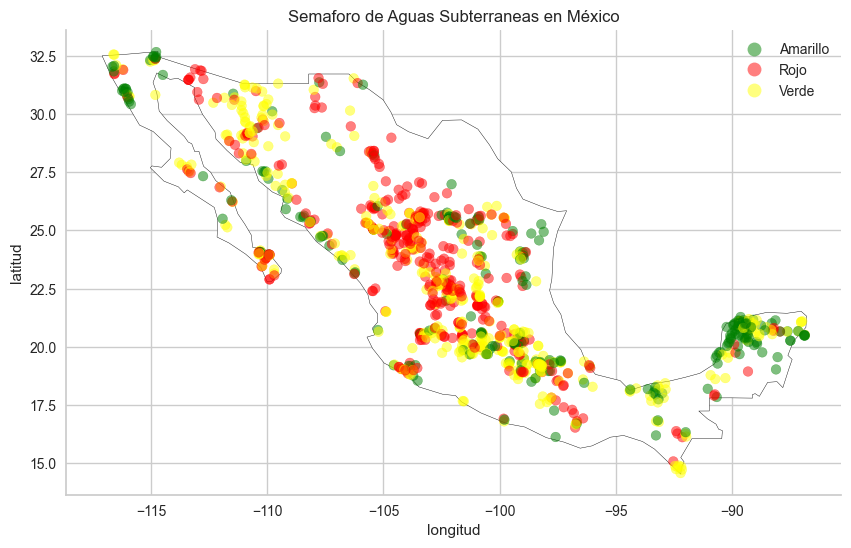

In [63]:

fig, gax = plt.subplots(figsize=(10,10))

#ploteando las filas en las cuales el país es México:
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


# Creamos una paleta de colores para los diferentes valores del semaforo:
semaforo_palette = {'Verde': 'green', 'Amarillo': 'yellow', 'Rojo' : 'red'}
cmap = matplotlib.colors.ListedColormap([semaforo_palette[b] for b in gdfsub.semaforo.unique()])

# Ploteamos las aguas suberraneas de nuestro GeoDataFrame con la paleta de colores de semaforo:
gdfsub.plot(ax=gax, column='semaforo', alpha = 0.5, legend=True, cmap=cmap)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Semaforo de Aguas Subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## kmeans Aguas Subterraneas

El agrupamiento de k-medias es un método de cuantificación vectorial, originario del procesamiento de señales, que tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana, sirviendo como un prototipo del grupo.


### Codo - Distorsión

Distorsión: se calcula como el promedio de las distancias al cuadrado desde los centros de los clústeres respectivos. Por lo general, se utiliza la métrica de distancia euclidiana.

El método del codo ejecuta el agrupamiento de k-medias en el conjunto de datos para un rango de valores de k (por ejemplo, de 1 a 10) y luego, para cada valor de k, calcula una puntuación promedio para todos los grupos. De forma predeterminada, se calcula la puntuación de distorsión, la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. 

KElbowVisualizer implementa el método "codo" para ayudar a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para k. Si el gráfico de líneas se asemeja a un brazo, entonces el "codo" (el punto de inflexión en la curva) es una buena indicación de que el modelo subyacente se ajusta mejor a ese punto. En el visualizador, el "codo" se anotará con una línea discontinua:

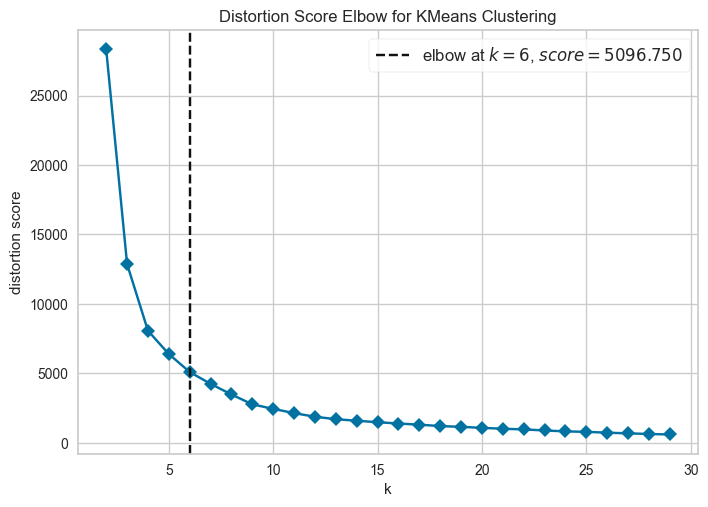

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
kmeans = KMeans(n_init=20)

visualizer = KElbowVisualizer(kmeans, k=(2,30),metric='distortion',timings=False,)
visualizer.fit(gdfsub[['latitud','longitud']])  
visualizer.show() 

Del gráfico podemos ver que el numero de clusters con máximo impacto es 6, despues de ese numero de clusters el impacto de nuevos clusters se reduce significativamente.


#### Agrupamiento K-Means
Realizamos el agrupamiento K-Means con 6 clusters, se crea una columna en el dataframe con las etiquetas de los centros de los clusters resultado de la reducción:

In [65]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(gdfsub[['latitud','longitud']]) # Calcule el clustering de k-medias.
gdfsub['cluster_sub'] = kmeans.fit_predict(gdfsub[['latitud','longitud']])
centerssub = kmeans.cluster_centers_ # Coordenadas de los centros de los clusters.

In [66]:
gdfsub.head()

index1                   sitio              organismo_cuenca  \
CLAVE                                                                        
DLAGU6        DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
DLAGU6516  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
DLAGU7        DLAGU7              POZO COSIO       LERMA SANTIAGO PACIFICO   
DLAGU9        DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
DLBAJ107    DLBAJ107      RANCHO EL TECOLOTE  PENINSULA DE BAJA CALIFORNIA   

                        estado        municipio                 acuifero  \
CLAVE                                                                      
DLAGU6          AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE   
DLAGU6516       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE   
DLAGU7          AGUASCALIENTES            COSIO  VALLE DE AGUASCALIENTES   
DLAGU9          AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES   
DLBAJ107   BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS   

          subtipo   longitud   latitud semaforo                  Coordinates  \
CLAVE                                                                          
DLAGU6       POZO -102.02210  22.20887    Verde  POINT (-102.02210 22.20887)   
DLAGU6516    POZO -102.20075  21.99958    Verde  POINT (-102.20075 21.99958)   
DLAGU7       POZO -102.28801  22.36685     Rojo  POINT (-102.28801 22.36685)   
DLAGU9       POZO -102.29449  22.18435    Verde  POINT (-102.29449 22.18435)   
DLBAJ107     POZO -110.24480  23.45138     Rojo  POINT (-110.24480 23.45138)   

           cluster_sub  
CLAVE                   
DLAGU6               3  
DLAGU6516            3  
DLAGU7               3  
DLAGU9               3  
DLBAJ107             5

#### Información de los centros de los clusteres

Se crea un geodataframe con las coordinadas de los centros de los clusters:

In [67]:
centers_dfsub= pd.DataFrame(data=centerssub, columns=['latitud','longitud'])
centers_dfsub["Coordinates"] = list(zip(centers_dfsub.longitud, centers_dfsub.latitud))
centers_dfsub["Coordinates"] = centers_dfsub["Coordinates"].apply(Point)
centers_gdfsub = gpd.GeoDataFrame(centers_dfsub, geometry="Coordinates")

In [68]:
geolocator = Nominatim(user_agent="geoapiExercises")

def city_state(row):
    coord = f"{row['latitud']}, {row['longitud']}"
    location = geolocator.reverse(coord)
    #print (location)
    if location is not None:
        address = location.raw['address']
        #print(address)
        state = address.get('state', '')
        row['state'] = state
        city = address.get('city', '')
        row['city'] = city
        county = address.get('county', '')
        row['county'] = county
    return row

centersub_geo= centers_gdfsub.apply(city_state, axis=1)
centersub_geo['id_clussub']= centersub_geo.index
centersub_geo

Coordinates city                 county    latitud  \
0   POINT (-98.54054 19.16152)                 Huejotzingo  19.161522   
1  POINT (-103.69361 25.36028)                       Lerdo  25.360282   
2   POINT (-90.01158 19.67929)       Municipio de Campeche  19.679287   
3  POINT (-101.74973 21.58635)             Lagos de Moreno  21.586350   
4  POINT (-112.30600 30.35326)                     Caborca  30.353260   
5  POINT (-109.28298 25.25636)  NaN                    NaN  25.256358   

     longitud     state  id_clussub  
0  -98.540545    Puebla           0  
1 -103.693611   Durango           1  
2  -90.011576  Campeche           2  
3 -101.749734   Jalisco           3  
4 -112.305999    Sonora           4  
5 -109.282982       NaN           5

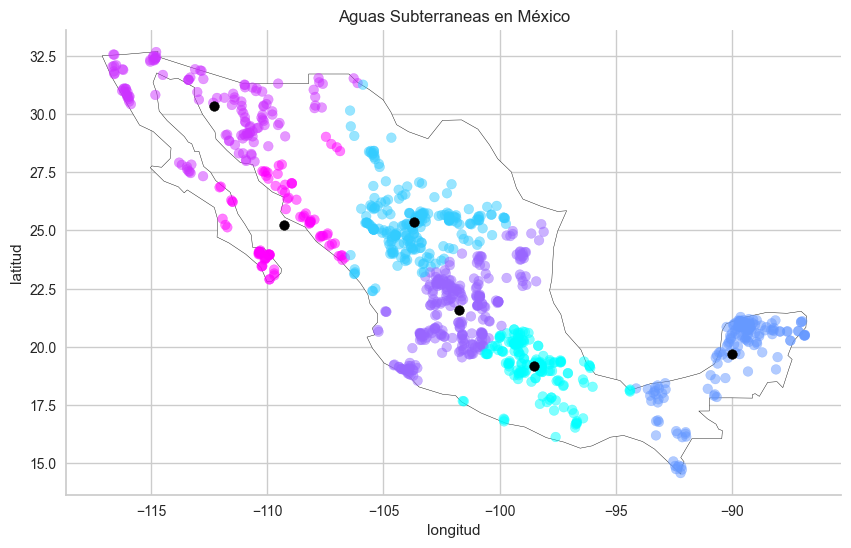

In [69]:
fig, gax = plt.subplots(figsize=(10,10))

#ploteando las filas en las cuales el país es México:
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')



# Ploteamos las aguas suberraneas de nuestro GeoDataFrame, con diferentes colores según el cluster al que pertenecen:

gdfsub.plot(ax=gax, column='cluster_sub', alpha = 0.5, cmap = 'cool')

# Ploteamos los centros de los clusters:
centers_gdfsub.plot(ax=gax, color='black')


gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas Subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## Relación entre la calidad del agua y su ubicación geográfica

In [71]:
gdfsub.head()

index1                   sitio              organismo_cuenca  \
CLAVE                                                                        
DLAGU6        DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
DLAGU6516  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
DLAGU7        DLAGU7              POZO COSIO       LERMA SANTIAGO PACIFICO   
DLAGU9        DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
DLBAJ107    DLBAJ107      RANCHO EL TECOLOTE  PENINSULA DE BAJA CALIFORNIA   

                        estado        municipio                 acuifero  \
CLAVE                                                                      
DLAGU6          AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE   
DLAGU6516       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE   
DLAGU7          AGUASCALIENTES            COSIO  VALLE DE AGUASCALIENTES   
DLAGU9          AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES   
DLBAJ107   BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS   

          subtipo   longitud   latitud semaforo                  Coordinates  \
CLAVE                                                                          
DLAGU6       POZO -102.02210  22.20887    Verde  POINT (-102.02210 22.20887)   
DLAGU6516    POZO -102.20075  21.99958    Verde  POINT (-102.20075 21.99958)   
DLAGU7       POZO -102.28801  22.36685     Rojo  POINT (-102.28801 22.36685)   
DLAGU9       POZO -102.29449  22.18435    Verde  POINT (-102.29449 22.18435)   
DLBAJ107     POZO -110.24480  23.45138     Rojo  POINT (-110.24480 23.45138)   

           cluster_sub  
CLAVE                   
DLAGU6               3  
DLAGU6516            3  
DLAGU7               3  
DLAGU9               3  
DLBAJ107             5

In [83]:
cross = pd.crosstab(index=gdfsub['cluster_sub'],columns=gdfsub['semaforo'],normalize='index').reindex(["Verde", "Amarillo", "Rojo"],axis='columns')
cross.style.background_gradient(cmap='Blues').format("{:.0%}")

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Verde

Creamos una columna index1 para conservar un identificador de los datos:

In [45]:
a_subte.index.is_unique

True

In [46]:
a_subte['index1'] = a_subte.index

In [47]:
a_subte.columns

Index(['sitio', 'organismo_cuenca', 'estado', 'municipio', 'acuifero',
       'subtipo', 'longitud', 'latitud', 'alc', 'calidad_alc', 'conduct',
       'calidad_conduct', 'sdt_m', 'calidad_sdt_ra', 'calidad_sdt_salin',
       'fluoruros', 'calidad_fluo', 'dur', 'calidad_dur', 'coli_fec',
       'calidad_coli_fec', 'n_no3', 'calidad_n_no3', 'as', 'calidad_as', 'cd',
       'calidad_cd', 'cr', 'calidad_cr', 'hg', 'calidad_hg', 'pb',
       'calidad_pb', 'mn', 'calidad_mn', 'fe', 'calidad_fe', 'semaforo',
       'contaminantes', 'cumple_alc', 'cumple_cond', 'cumple_sdt_ra',
       'cumple_sdt_salin', 'cumple_fluo', 'cumple_dur', 'cumple_cf',
       'cumple_no3', 'cumple_as', 'cumple_cd', 'cumple_cr', 'cumple_hg',
       'cumple_pb', 'cumple_mn', 'cumple_fe', 'semaforo_e', 'index1'],
      dtype='object')

Seleccionamos las columnas que usaremos para K-means:

In [48]:
dfsubv=a_subte.loc[a_subte['semaforo']=='Verde',['index1','sitio','organismo_cuenca','estado','municipio','acuifero','subtipo','longitud','latitud','semaforo']]

Creamos el campo coordenadas con una tupla de la longitud y latitud de los datos:

In [49]:
dfsubv["Coordinates"] = list(zip(dfsubv.longitud, dfsubv.latitud))

Utilizamos las clase Point de shapely.Geometry. Poin es un tipo de geometría que representa una única coordenada con valores x,y y:

In [50]:
dfsubv["Coordinates"] = dfsubv["Coordinates"].apply(Point)

Creamos un GeoDataFrame comenzando desde un DataFrame regular, usamos la lista de objetos shapely.Point y la establecemos como una geometria:

In [51]:
gdfsubv = gpd.GeoDataFrame(dfsubv, geometry="Coordinates")

Leemos el archivo de mapa:

In [52]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

## kmeans Aguas Subterraneas

El agrupamiento de k-medias es un método de cuantificación vectorial, originario del procesamiento de señales, que tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana, sirviendo como un prototipo del grupo.


### Codo - Distorsión

Distorsión: se calcula como el promedio de las distancias al cuadrado desde los centros de los clústeres respectivos. Por lo general, se utiliza la métrica de distancia euclidiana.

El método del codo ejecuta el agrupamiento de k-medias en el conjunto de datos para un rango de valores de k (por ejemplo, de 1 a 10) y luego, para cada valor de k, calcula una puntuación promedio para todos los grupos. De forma predeterminada, se calcula la puntuación de distorsión, la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. 

KElbowVisualizer implementa el método "codo" para ayudar a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para k. Si el gráfico de líneas se asemeja a un brazo, entonces el "codo" (el punto de inflexión en la curva) es una buena indicación de que el modelo subyacente se ajusta mejor a ese punto. En el visualizador, el "codo" se anotará con una línea discontinua:

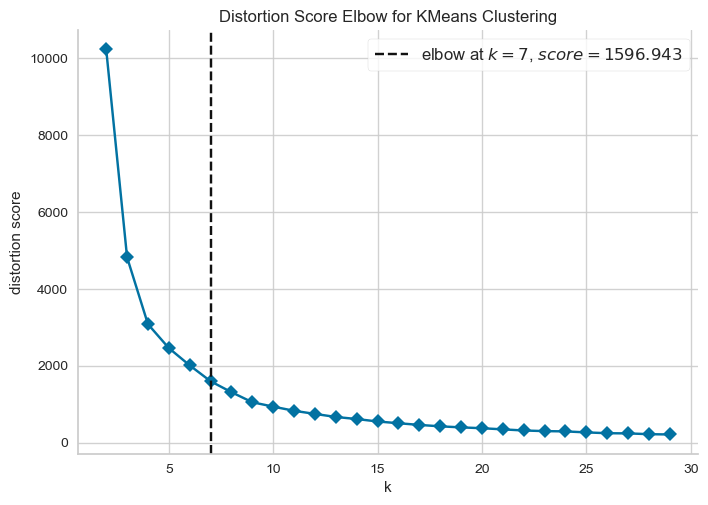

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
kmeans = KMeans(n_init=20)

visualizer = KElbowVisualizer(kmeans, k=(2,30),metric='distortion',timings=False,)
visualizer.fit(gdfsubv[['latitud','longitud']])  
visualizer.show() 

Del gráfico podemos ver que el numero de clusters con máximo impacto es 7, despues de ese numero de clusters el impacto de nuevos clusters se reduce significativamente.


#### Agrupamiento K-Means
Realizamos el agrupamiento K-Means con 6 clusters, se crea una columna en el dataframe con las etiquetas de los centros de los clusters resultado de la reducción:

In [54]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(gdfsubv[['latitud','longitud']]) # Calcule el clustering de k-medias.
gdfsubv['cluster_sub'] = kmeans.fit_predict(gdfsubv[['latitud','longitud']])
centerssub = kmeans.cluster_centers_ # Coordenadas de los centros de los clusters.

In [55]:
gdfsubv.head()

index1                   sitio              organismo_cuenca  \
CLAVE                                                                        
DLAGU6        DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
DLAGU6516  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
DLAGU9        DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
DLBAJ110    DLBAJ110       POZO 26_ SAN JUAN  PENINSULA DE BAJA CALIFORNIA   
DLBAJ117    DLBAJ117            LAS PARRITAS  PENINSULA DE BAJA CALIFORNIA   

                        estado        municipio                 acuifero  \
CLAVE                                                                      
DLAGU6          AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE   
DLAGU6516       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE   
DLAGU9          AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES   
DLBAJ110   BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS   
DLBAJ117   BAJA CALIFORNIA SUR           LA PAZ              EL CARRIZAL   

          subtipo    longitud    latitud semaforo  \
CLAVE                                               
DLAGU6       POZO -102.022100  22.208870    Verde   
DLAGU6516    POZO -102.200750  21.999580    Verde   
DLAGU9       POZO -102.294490  22.184350    Verde   
DLBAJ110     POZO -110.213960  23.474600    Verde   
DLBAJ117     POZO -110.088778  23.799861    Verde   

                           Coordinates  cluster_sub  
CLAVE                                                
DLAGU6     POINT (-102.02210 22.20887)            1  
DLAGU6516  POINT (-102.20075 21.99958)            1  
DLAGU9     POINT (-102.29449 22.18435)            1  
DLBAJ110   POINT (-110.21396 23.47460)            4  
DLBAJ117   POINT (-110.08878 23.79986)            4

#### Información de los centros de los clusteres

Se crea un geodataframe con las coordinadas de los centros de los clusters:

In [56]:
centers_dfsubv= pd.DataFrame(data=centerssub, columns=['latitud','longitud'])
centers_dfsubv["Coordinates"] = list(zip(centers_dfsubv.longitud, centers_dfsubv.latitud))
centers_dfsubv["Coordinates"] = centers_dfsubv["Coordinates"].apply(Point)
centers_gdfsubv = gpd.GeoDataFrame(centers_dfsubv, geometry="Coordinates")

In [57]:
geolocator = Nominatim(user_agent="geoapiExercises")

def city_state(row):
    coord = f"{row['latitud']}, {row['longitud']}"
    location = geolocator.reverse(coord)
    #print (location)
    if location is not None:
        address = location.raw['address']
        #print(address)
        state = address.get('state', '')
        row['state'] = state
        city = address.get('city', '')
        row['city'] = city
        county = address.get('county', '')
        row['county'] = county
    return row

centersub_geo= centers_gdfsubv.apply(city_state, axis=1)
centersub_geo['id_clussub']= centersub_geo.index
centersub_geo

Coordinates             city                 county  \
0   POINT (-89.03273 20.70281)                                Kantunil   
1  POINT (-101.82247 21.31077)  Lagos de Moreno        Lagos de Moreno   
2  POINT (-111.64513 29.99296)                              Trincheras   
3   POINT (-98.71141 19.25769)                                  Chalco   
4  POINT (-109.12812 25.16541)              NaN                    NaN   
5   POINT (-92.76097 16.88256)                              Larráinzar   
6  POINT (-103.49091 25.18521)                   General Simón Bolívar   

     latitud    longitud             state  id_clussub  
0  20.702813  -89.032725           Yucatán           0  
1  21.310767 -101.822465           Jalisco           1  
2  29.992964 -111.645133            Sonora           2  
3  19.257692  -98.711408  Estado de México           3  
4  25.165409 -109.128120               NaN           4  
5  16.882562  -92.760974           Chiapas           5  
6  25.185213 -103.490906           Durango           6

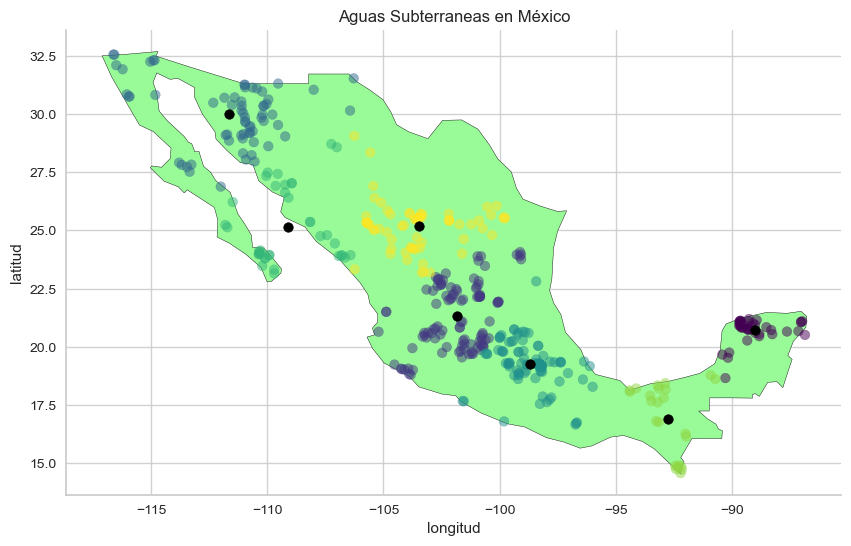

In [58]:
fig, gax = plt.subplots(figsize=(10,10))

#ploteando las filas en las cuales el país es México:
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='palegreen')



# Ploteamos las aguas suberraneas de nuestro GeoDataFrame, con diferentes colores según el cluster al que pertenecen:

gdfsubv.plot(ax=gax, column='cluster_sub', alpha = 0.5, cmap = 'viridis')

# Ploteamos los centros de los clusters:
centers_gdfsubv.plot(ax=gax, color='black')


gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas Subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Amarillo

Creamos una columna index1 para conservar un identificador de los datos:

In [59]:
a_subte.index.is_unique

True

In [60]:
a_subte['index1'] = a_subte.index

In [61]:
a_subte.columns

Index(['sitio', 'organismo_cuenca', 'estado', 'municipio', 'acuifero',
       'subtipo', 'longitud', 'latitud', 'alc', 'calidad_alc', 'conduct',
       'calidad_conduct', 'sdt_m', 'calidad_sdt_ra', 'calidad_sdt_salin',
       'fluoruros', 'calidad_fluo', 'dur', 'calidad_dur', 'coli_fec',
       'calidad_coli_fec', 'n_no3', 'calidad_n_no3', 'as', 'calidad_as', 'cd',
       'calidad_cd', 'cr', 'calidad_cr', 'hg', 'calidad_hg', 'pb',
       'calidad_pb', 'mn', 'calidad_mn', 'fe', 'calidad_fe', 'semaforo',
       'contaminantes', 'cumple_alc', 'cumple_cond', 'cumple_sdt_ra',
       'cumple_sdt_salin', 'cumple_fluo', 'cumple_dur', 'cumple_cf',
       'cumple_no3', 'cumple_as', 'cumple_cd', 'cumple_cr', 'cumple_hg',
       'cumple_pb', 'cumple_mn', 'cumple_fe', 'semaforo_e', 'index1'],
      dtype='object')

Seleccionamos las columnas que usaremos para K-means:

In [62]:
dfsuba=a_subte.loc[a_subte['semaforo']=='Amarillo',['index1','sitio','organismo_cuenca','estado','municipio','acuifero','subtipo','longitud','latitud','semaforo']]

Creamos el campo coordenadas con una tupla de la longitud y latitud de los datos:

In [63]:
dfsuba["Coordinates"] = list(zip(dfsuba.longitud, dfsuba.latitud))

Utilizamos las clase Point de shapely.Geometry. Poin es un tipo de geometría que representa una única coordenada con valores x,y y:

In [64]:
dfsuba["Coordinates"] = dfsuba["Coordinates"].apply(Point)

Creamos un GeoDataFrame comenzando desde un DataFrame regular, usamos la lista de objetos shapely.Point y la establecemos como una geometria:

In [65]:
gdfsuba = gpd.GeoDataFrame(dfsuba, geometry="Coordinates")

Leemos el archivo de mapa:

In [66]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

## kmeans Aguas Subterraneas

El agrupamiento de k-medias es un método de cuantificación vectorial, originario del procesamiento de señales, que tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana, sirviendo como un prototipo del grupo.


### Codo - Distorsión

Distorsión: se calcula como el promedio de las distancias al cuadrado desde los centros de los clústeres respectivos. Por lo general, se utiliza la métrica de distancia euclidiana.

El método del codo ejecuta el agrupamiento de k-medias en el conjunto de datos para un rango de valores de k (por ejemplo, de 1 a 10) y luego, para cada valor de k, calcula una puntuación promedio para todos los grupos. De forma predeterminada, se calcula la puntuación de distorsión, la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. 

KElbowVisualizer implementa el método "codo" para ayudar a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para k. Si el gráfico de líneas se asemeja a un brazo, entonces el "codo" (el punto de inflexión en la curva) es una buena indicación de que el modelo subyacente se ajusta mejor a ese punto. En el visualizador, el "codo" se anotará con una línea discontinua:

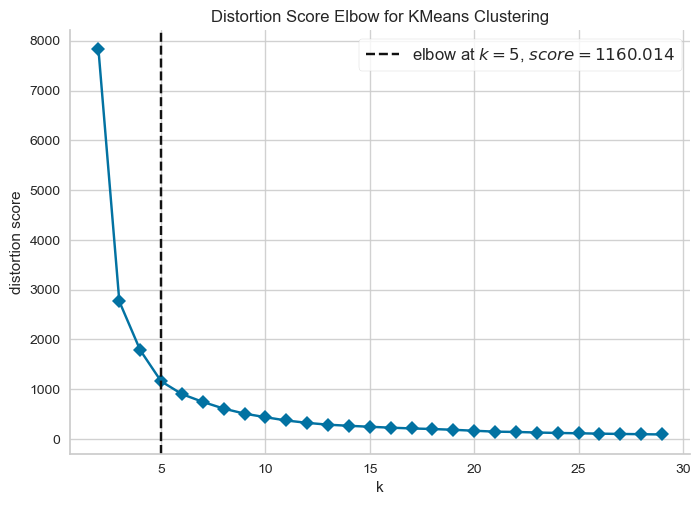

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
kmeans = KMeans(n_init=20)

visualizer = KElbowVisualizer(kmeans, k=(2,30),metric='distortion',timings=False,)
visualizer.fit(gdfsuba[['latitud','longitud']])  
visualizer.show() 

Del gráfico podemos ver que el numero de clusters con máximo impacto es 5, despues de ese numero de clusters el impacto de nuevos clusters se reduce significativamente.


#### Agrupamiento K-Means
Realizamos el agrupamiento K-Means con 5 clusters, se crea una columna en el dataframe con las etiquetas de los centros de los clusters resultado de la reducción:

In [68]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(gdfsuba[['latitud','longitud']]) # Calcule el clustering de k-medias.
gdfsuba['cluster_sub'] = kmeans.fit_predict(gdfsuba[['latitud','longitud']])
centerssub = kmeans.cluster_centers_ # Coordenadas de los centros de los clusters.

In [69]:
gdfsuba.head()

index1                              sitio  \
CLAVE                                                   
DLBAJ131  DLBAJ131            L. 20_ EJ. STO. DOMINGO   
DLBAJ150  DLBAJ150                            POZO 2A   
DLBAJ161  DLBAJ161  CNA-SI-03 (EJ. ALFREDO V. BONFIL)   
DLBAJ70    DLBAJ70      POZO NO. XII (ANTES A.P. XII)   
DLBAJ71    DLBAJ71                         A.P. NO. X   

                      organismo_cuenca               estado municipio  \
CLAVE                                                                   
DLBAJ131  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR   COMONDU   
DLBAJ150  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR    LORETO   
DLBAJ161  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR    MULEGE   
DLBAJ70   PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR    LA PAZ   
DLBAJ71   PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR    LA PAZ   

                   acuifero subtipo    longitud   latitud  semaforo  \
CLAVE                                                                 
DLBAJ131      SANTO DOMINGO    POZO -111.922210  25.50470  Amarillo   
DLBAJ150  SAN JUAN B. LONDO    POZO -111.548940  26.30176  Amarillo   
DLBAJ161        SAN IGNACIO    POZO -112.762754  27.33590  Amarillo   
DLBAJ70              LA PAZ    POZO -110.307730  24.08008  Amarillo   
DLBAJ71              LA PAZ    POZO -110.315380  24.05496  Amarillo   

                          Coordinates  cluster_sub  
CLAVE                                               
DLBAJ131  POINT (-111.92221 25.50470)            0  
DLBAJ150  POINT (-111.54894 26.30176)            0  
DLBAJ161  POINT (-112.76275 27.33590)            0  
DLBAJ70   POINT (-110.30773 24.08008)            0  
DLBAJ71   POINT (-110.31538 24.05496)            0

#### Información de los centros de los clusteres

Se crea un geodataframe con las coordinadas de los centros de los clusters:

In [70]:
centers_dfsuba= pd.DataFrame(data=centerssub, columns=['latitud','longitud'])
centers_dfsuba["Coordinates"] = list(zip(centers_dfsuba.longitud, centers_dfsuba.latitud))
centers_dfsuba["Coordinates"] = centers_dfsuba["Coordinates"].apply(Point)
centers_gdfsuba = gpd.GeoDataFrame(centers_dfsuba, geometry="Coordinates")

In [71]:
geolocator = Nominatim(user_agent="geoapiExercises")

def city_state(row):
    coord = f"{row['latitud']}, {row['longitud']}"
    location = geolocator.reverse(coord)
    #print (location)
    if location is not None:
        address = location.raw['address']
        #print(address)
        state = address.get('state', '')
        row['state'] = state
        city = address.get('city', '')
        row['city'] = city
        county = address.get('county', '')
        row['county'] = county
    return row

centersub_geo= centers_gdfsuba.apply(city_state, axis=1)
centersub_geo['id_clussub']= centersub_geo.index
centersub_geo

latitud    longitud                  Coordinates             state city  \
0  26.340876 -108.671004  POINT (-108.67100 26.34088)           Sinaloa        
1  19.677175  -99.845885   POINT (-99.84588 19.67718)  Estado de México        
2  20.098950  -89.814725   POINT (-89.81472 20.09895)          Campeche        
3  31.548962 -115.504422  POINT (-115.50442 31.54896)   Baja California        
4  24.707553 -100.879004  POINT (-100.87900 24.70755)          Coahuila        

                    county  id_clussub  
0                El Fuerte           0  
1               Ixtlahuaca           1  
2                Hopelchén           2  
3  Municipio de San Felipe           3  
4                 Saltillo           4

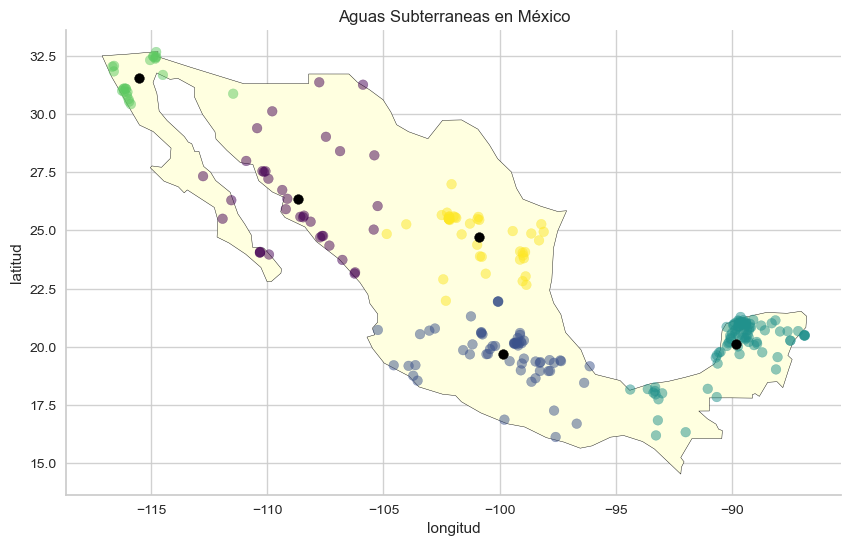

In [88]:
fig, gax = plt.subplots(figsize=(10,10))

#ploteando las filas en las cuales el país es México:
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='lightyellow')



# Ploteamos las aguas suberraneas de nuestro GeoDataFrame, con diferentes colores según el cluster al que pertenecen:

gdfsuba.plot(ax=gax, column='cluster_sub', alpha = 0.5, cmap = 'viridis')

# Ploteamos los centros de los clusters:
centers_gdfsuba.plot(ax=gax, color='black')


gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas Subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Rojo

Creamos una columna index1 para conservar un identificador de los datos:

In [73]:
a_subte.index.is_unique

True

In [74]:
a_subte['index1'] = a_subte.index

In [75]:
a_subte.columns

Index(['sitio', 'organismo_cuenca', 'estado', 'municipio', 'acuifero',
       'subtipo', 'longitud', 'latitud', 'alc', 'calidad_alc', 'conduct',
       'calidad_conduct', 'sdt_m', 'calidad_sdt_ra', 'calidad_sdt_salin',
       'fluoruros', 'calidad_fluo', 'dur', 'calidad_dur', 'coli_fec',
       'calidad_coli_fec', 'n_no3', 'calidad_n_no3', 'as', 'calidad_as', 'cd',
       'calidad_cd', 'cr', 'calidad_cr', 'hg', 'calidad_hg', 'pb',
       'calidad_pb', 'mn', 'calidad_mn', 'fe', 'calidad_fe', 'semaforo',
       'contaminantes', 'cumple_alc', 'cumple_cond', 'cumple_sdt_ra',
       'cumple_sdt_salin', 'cumple_fluo', 'cumple_dur', 'cumple_cf',
       'cumple_no3', 'cumple_as', 'cumple_cd', 'cumple_cr', 'cumple_hg',
       'cumple_pb', 'cumple_mn', 'cumple_fe', 'semaforo_e', 'index1'],
      dtype='object')

Seleccionamos las columnas que usaremos para K-means:

In [76]:
dfsubr=a_subte.loc[a_subte['semaforo']=='Rojo',['index1','sitio','organismo_cuenca','estado','municipio','acuifero','subtipo','longitud','latitud','semaforo']]

Creamos el campo coordenadas con una tupla de la longitud y latitud de los datos:

In [77]:
dfsubr["Coordinates"] = list(zip(dfsubr.longitud, dfsubr.latitud))

Utilizamos las clase Point de shapely.Geometry. Poin es un tipo de geometría que representa una única coordenada con valores x,y y:

In [78]:
dfsubr["Coordinates"] = dfsubr["Coordinates"].apply(Point)

Creamos un GeoDataFrame comenzando desde un DataFrame regular, usamos la lista de objetos shapely.Point y la establecemos como una geometria:

In [79]:
gdfsubr = gpd.GeoDataFrame(dfsubr, geometry="Coordinates")

Leemos el archivo de mapa:

In [80]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

## kmeans Aguas Subterraneas

El agrupamiento de k-medias es un método de cuantificación vectorial, originario del procesamiento de señales, que tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con la media más cercana, sirviendo como un prototipo del grupo.


### Codo - Distorsión

Distorsión: se calcula como el promedio de las distancias al cuadrado desde los centros de los clústeres respectivos. Por lo general, se utiliza la métrica de distancia euclidiana.

El método del codo ejecuta el agrupamiento de k-medias en el conjunto de datos para un rango de valores de k (por ejemplo, de 1 a 10) y luego, para cada valor de k, calcula una puntuación promedio para todos los grupos. De forma predeterminada, se calcula la puntuación de distorsión, la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. 

KElbowVisualizer implementa el método "codo" para ayudar a seleccionar la cantidad óptima de clústeres ajustando el modelo con un rango de valores para k. Si el gráfico de líneas se asemeja a un brazo, entonces el "codo" (el punto de inflexión en la curva) es una buena indicación de que el modelo subyacente se ajusta mejor a ese punto. En el visualizador, el "codo" se anotará con una línea discontinua:

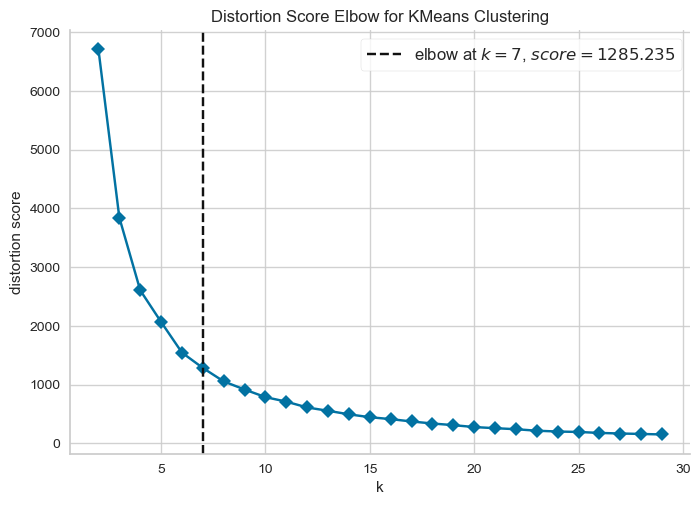

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
kmeans = KMeans(n_init=20)

visualizer = KElbowVisualizer(kmeans, k=(2,30),metric='distortion',timings=False,)
visualizer.fit(gdfsubr[['latitud','longitud']])  
visualizer.show() 

Del gráfico podemos ver que el numero de clusters con máximo impacto es 7, despues de ese numero de clusters el impacto de nuevos clusters se reduce significativamente.


#### Agrupamiento K-Means
Realizamos el agrupamiento K-Means con 6 clusters, se crea una columna en el dataframe con las etiquetas de los centros de los clusters resultado de la reducción:

In [82]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(gdfsubr[['latitud','longitud']]) # Calcule el clustering de k-medias.
gdfsubr['cluster_sub'] = kmeans.fit_predict(gdfsubr[['latitud','longitud']])
centerssub = kmeans.cluster_centers_ # Coordenadas de los centros de los clusters.

In [83]:
gdfsubr.head()

index1                                    sitio  \
CLAVE                                                         
DLAGU7      DLAGU7                               POZO COSIO   
DLBAJ107  DLBAJ107                       RANCHO EL TECOLOTE   
DLBAJ108  DLBAJ108  POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6)   
DLBAJ111  DLBAJ111                       VICTOR HUGO CESEÑA   
DLBAJ118  DLBAJ118                              SAN ANTONIO   

                      organismo_cuenca               estado  municipio  \
CLAVE                                                                    
DLAGU7         LERMA SANTIAGO PACIFICO       AGUASCALIENTES      COSIO   
DLBAJ107  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR     LA PAZ   
DLBAJ108  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR     LA PAZ   
DLBAJ111  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR  LOS CABOS   
DLBAJ118  PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR     LA PAZ   

                         acuifero subtipo    longitud    latitud semaforo  \
CLAVE                                                                       
DLAGU7    VALLE DE AGUASCALIENTES    POZO -102.288010  22.366850     Rojo   
DLBAJ107             TODOS SANTOS    POZO -110.244800  23.451380     Rojo   
DLBAJ108             TODOS SANTOS    POZO -110.220670  23.464930     Rojo   
DLBAJ111           CABO SAN LUCAS    POZO -109.907306  22.890500     Rojo   
DLBAJ118               LOS PLANES    POZO -110.054722  23.824722     Rojo   

                          Coordinates  cluster_sub  
CLAVE                                               
DLAGU7    POINT (-102.28801 22.36685)            0  
DLBAJ107  POINT (-110.24480 23.45138)            4  
DLBAJ108  POINT (-110.22067 23.46493)            4  
DLBAJ111  POINT (-109.90731 22.89050)            4  
DLBAJ118  POINT (-110.05472 23.82472)            4

#### Información de los centros de los clusteres

Se crea un geodataframe con las coordinadas de los centros de los clusters:

In [84]:
centers_dfsubr= pd.DataFrame(data=centerssub, columns=['latitud','longitud'])
centers_dfsubr["Coordinates"] = list(zip(centers_dfsubr.longitud, centers_dfsubr.latitud))
centers_dfsubr["Coordinates"] = centers_dfsubr["Coordinates"].apply(Point)
centers_gdfsubr = gpd.GeoDataFrame(centers_dfsubr, geometry="Coordinates")

In [85]:
geolocator = Nominatim(user_agent="geoapiExercises")

def city_state(row):
    coord = f"{row['latitud']}, {row['longitud']}"
    location = geolocator.reverse(coord)
    #print (location)
    if location is not None:
        address = location.raw['address']
        #print(address)
        state = address.get('state', '')
        row['state'] = state
        city = address.get('city', '')
        row['city'] = city
        county = address.get('county', '')
        row['county'] = county
    return row

centersub_geo= centers_gdfsubr.apply(city_state, axis=1)
centersub_geo['id_clussub']= centersub_geo.index
centersub_geo

Coordinates city               county    latitud  \
0  POINT (-101.45435 23.22265)             Santo Domingo  23.222652   
1  POINT (-111.64969 30.29935)                Trincheras  30.299353   
2   POINT (-90.15919 18.73861)                 Escárcega  18.738614   
3  POINT (-102.93165 20.59472)               Zapotlanejo  20.594715   
4  POINT (-109.48741 24.80498)  NaN                  NaN  24.804985   
5   POINT (-98.29251 18.95296)                  Ocoyucan  18.952964   
6  POINT (-104.26432 25.53986)       San Pedro del Gallo  25.539859   

     longitud            state  id_clussub  
0 -101.454348  San Luis Potosí           0  
1 -111.649687           Sonora           1  
2  -90.159193         Campeche           2  
3 -102.931655          Jalisco           3  
4 -109.487415              NaN           4  
5  -98.292505           Puebla           5  
6 -104.264316          Durango           6

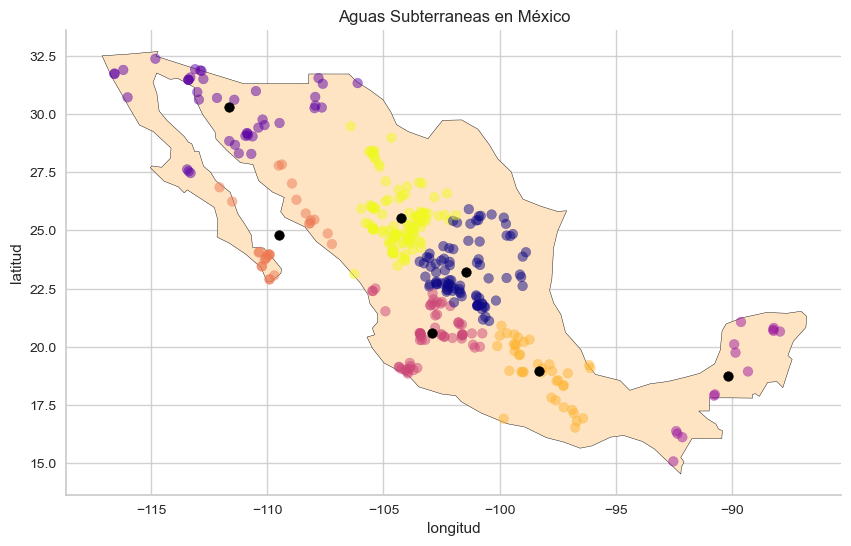

In [86]:
fig, gax = plt.subplots(figsize=(10,10))

#ploteando las filas en las cuales el país es México:
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='bisque')



# Ploteamos las aguas suberraneas de nuestro GeoDataFrame, con diferentes colores según el cluster al que pertenecen:

gdfsubr.plot(ax=gax, column='cluster_sub', alpha = 0.5, cmap = 'plasma')

# Ploteamos los centros de los clusters:
centers_gdfsubr.plot(ax=gax, color='black')


gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas Subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()